In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
#import seaborn as sns
import numpy as np
import math
import tkinter as tk
from tkinter import filedialog
import glob
import os
#from sklearn.linear_model import LinearRegression

In [3]:
# Create a Tkinter root object
root = tk.Tk()
root.withdraw()  # Hide the root window

# Launch a folder dialog box and store the selected folder path in a variable
folder_path = filedialog.askdirectory()

# Print the selected folder path
print(folder_path)

2023-05-19 17:52:12.577 python[1626:46806] +[CATransaction synchronize] called within transaction
2023-05-19 17:52:12.785 python[1626:46806] +[CATransaction synchronize] called within transaction
2023-05-19 17:52:12.975 python[1626:46806] +[CATransaction synchronize] called within transaction
2023-05-19 17:52:14.590 python[1626:46806] +[CATransaction synchronize] called within transaction
2023-05-19 17:52:16.375 python[1626:46806] +[CATransaction synchronize] called within transaction
2023-05-19 17:52:16.491 python[1626:46806] +[CATransaction synchronize] called within transaction


/Volumes/snaik/PHD_data/Imaging_et_analysis/Sp5imaging/Pipettes/Analysis/Analysis_15112021_TgKrt18MemPull/Pipette


In [4]:
outputfolder=folder_path+"/IntensityPlots18052023/"
if not os.path.isdir(outputfolder):
    os.makedirs(outputfolder)
csvfiles=glob.glob(folder_path+"/*.csv")


In [5]:
def pdsorter(files=csvfiles):
    csvdict={}
    for index in range(len(csvfiles)):
        posidx=csvfiles[index].find("Pos")
        csvdict[csvfiles[index][posindex:posindex+6]]=pd.read_csv(csvfiles[index])
        
posindex=csvfiles[0].find("Pos")
print(csvfiles[0][posindex:posindex+6])

Pos002


ValueError: x and y must be the same size

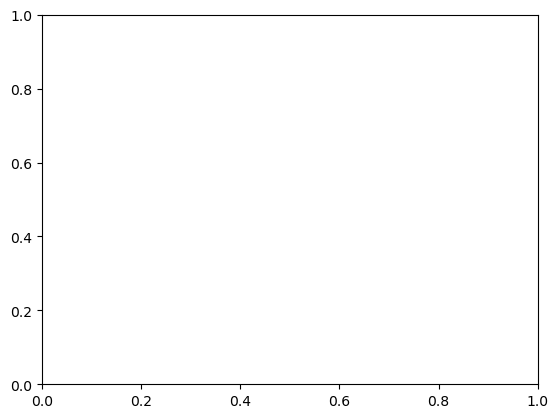

In [6]:
csvfile=pd.read_csv(csvfiles[0])
plt.scatter(csvfile[" "].iloc[1::2],csvfile.iloc[1::2]['Mean']/csvfile.iloc[::2]["Mean"])

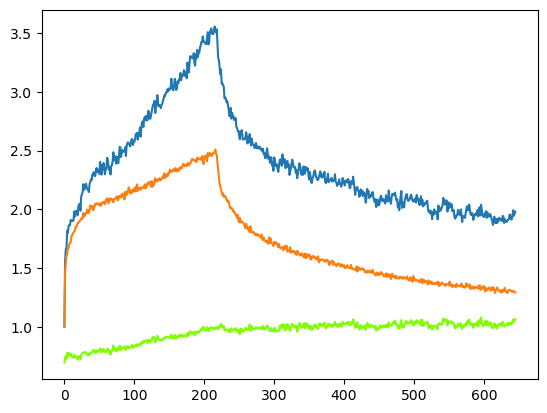

In [7]:
time=np.linspace(0,len(csvfile[" "].iloc[::2]),len(csvfile[" "].iloc[1::2]),dtype=int)
divided_mean = csvfile.iloc[1::2]['Mean'].reset_index(drop=True)/csvfile.iloc[::2]["Mean"].reset_index(drop=True)
plt.plot(time,divided_mean,color='chartreuse')
plt.plot(time,csvfile.iloc[1::2]['Mean']/np.min(csvfile.iloc[1::2]['Mean']))
plt.plot(time,csvfile.iloc[0::2]['Mean']/np.min(csvfile.iloc[::2]['Mean']))

Script to link the strain and maxstrain on the tissue to the changes in Intensity
To do: 2 plots 
Max Strain vs Max change in Intensity 
Strain vs Intensity binned and plotted with max strain point as the inflection

In [16]:
folder="H:\\PHD_data\\Imaging_et_analysis\\Sp5imaging\\Pipettes\\11_nov\\26112021\\"
intfolder="H:\\PHD_data\\Imaging_et_analysis\\Sp5imaging\\Pipettes\\11_nov\\26112021\\Analysis\\Pipette"
IntCsv=glob.glob(intfolder+"\\*Pip*.csv")
StrainCsv=glob.glob(folder+"\\*\\*Value*.csv")

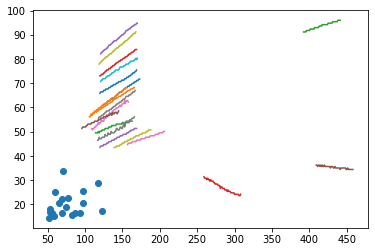

In [68]:
maxStrain=[]
maxExpression=[]  
maxStraindf=pd.DataFrame(columns=["Pos","MaxStrain","StrainRate","MaxExpression"],index=np.arange(len(StrainCsv)))
for filenumber,file in enumerate(StrainCsv):
    position=file[-9:-4]
    intdf=pd.read_csv([x for x in IntCsv if position in x][0])
    Straindf=pd.read_csv(file)
    strainExpressiondf=pd.DataFrame()
    strainExpressiondf["Strain"]=Straindf["microns"]-np.min(Straindf["microns"])
    strainExpressiondf["Expression"]=intdf["Mean"]
    # Select the data
    selected_data = strainExpressiondf[strainExpressiondf["Strain"].idxmax()-60:strainExpressiondf["Strain"].idxmax()-10][["Strain"]]
    plt.plot(selected_data)
    # Fit a linear regression to the data
    reg = LinearRegression().fit(np.arange(50).reshape(-1,1),selected_data[["Strain"]])
    # Get the slope of the regression line
    StrainRate= reg.coef_[0][0]
    maxStraindf["Pos"][filenumber]=position
    maxStraindf["MaxStrain"][filenumber]=np.max(strainExpressiondf["Strain"])
    maxStraindf["StrainRate"][filenumber]=StrainRate
    maxStraindf["MaxExpression"][filenumber]=np.max(strainExpressiondf["Expression"])
    maxStrain.append(np.max(strainExpressiondf["Strain"]))
    maxExpression.append(np.max(strainExpressiondf["Expression"]))
plt.scatter(maxStrain,maxExpression)

In [69]:
from scipy.interpolate import CubicSpline

# Select the data
data = strainExpressiondf["Strain"]

# Fit a cubic spline to the data
spline = CubicSpline(range(len(data)), data)

# Find the inflection point
inflection_point = spline.derivative(nu=2).roots()[0]

print("The inflection point is at index:", inflection_point)

The inflection point is at index: 0.9585413897593866


In [95]:
Intdf=pd.read_csv(IntCsv[0])
Intdf

Mean  Mode  Min  Max  Ch  Frame  MinThr  MaxThr
0      1   4.775     3    3   68   1      1       0     255
1      2   9.106     1    1   57   2      1       0     255
2      3   5.394     3    3   53   1      2       0     255
3      4  10.256     2    1   75   2      2       0     255
4      5   6.383     3    3   92   1      3       0     255
..   ...     ...   ...  ...  ...  ..    ...     ...     ...
951  952  15.371     1    1  139   2    476       0     255
952  953  10.133     3    3  233   1    477       0     255
953  954  15.271     1    1  104   2    477       0     255
954  955  10.180     3    3  233   1    478       0     255
955  956  15.540     1    1  121   2    478       0     255

[956 rows x 9 columns]

In [4]:
#A function to find the intensity around the inflection points and plotting them in a line plot

def findKIntensitymid(files):
    PeakPlotdf=pd.DataFrame()
    for file in files:
        intdf=pd.read_csv(file)
        position=file[-9:-4]
        Keratindf=intdf.iloc[1::2].reset_index(drop=True)
        Utrophindf=intdf.iloc[::2].reset_index(drop=True)
        # Select the data
        selected_data = Keratindf[Keratindf["Mean"].idxmax()-150:Keratindf["Mean"].idxmax()+150][["Mean"]]
        #plot the data 
        
        fig,ax=plt.subplots(figsize=(7, 5.3))
        plt.title("P"+position)
        plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
        plt.rcParams['font.size'] = 24
        plt.rcParams['savefig.dpi'] = 300
        plt.rcParams['font.family'] = 'sans-serif'
        plt.rcParams['font.sans-serif'] = 'Arial'
        plt.gca().spines['right'].set_color('none')
        plt.gca().spines['top'].set_color('none')
        plt.plot(selected_data,color="#83bb03",linewidth=3)
        plt.plot(Keratindf["Mean"],color="#ff7f0e",linewidth=1)
        ax.set_xlabel("Time (s)")
        ax.set_ylabel("Intensity (a.u.)")
        plt.savefig(outputfolder+"P"+position+".png",bbox_inches='tight',dpi=300, transparent=True)
        plt.show()
        plt.close()
        PeakPlotdf["P"+position]=selected_data["Mean"].reset_index(drop=True)
    PeakPlotdf.to_csv(outputfolder+"PeakPlot.csv",index=False)
    return PeakPlotdf

outputfolder="H:\\PHD_data\\Imaging_et_analysis\\Sp5imaging\\Pipettes\\11_nov\\26112021\\Analysis\\Pipette\\1910_Inttest\\"
if not os.path.isdir(outputfolder):
    os.makedirs(outputfolder)
PeakPlotdf=findKIntensitymid(IntCsv)

NameError: name 'IntCsv' is not defined

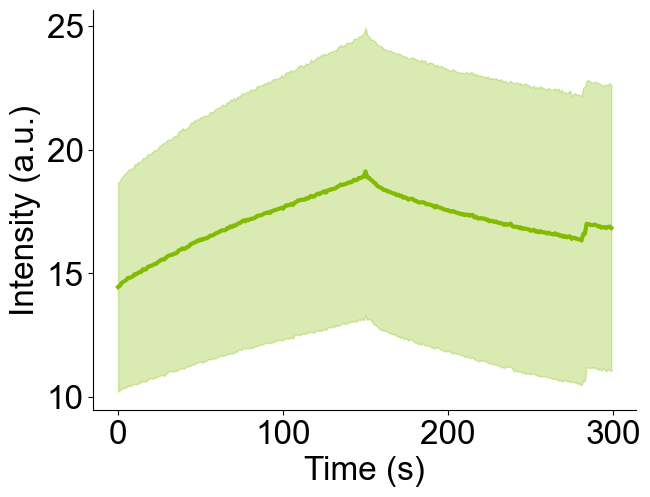

In [23]:
#plot the mean of data in PeakPLotdf as a line plot with the standard deviation as a shaded area
fig,ax=plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.plot(PeakPlotdf.mean(axis=1),color="#83bb03",linewidth=3)   
plt.fill_between(PeakPlotdf.index,PeakPlotdf.mean(axis=1)-PeakPlotdf.std(axis=1),PeakPlotdf.mean(axis=1)+PeakPlotdf.std(axis=1),alpha=0.3,color="#83bb03")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Intensity (a.u.)")
plt.savefig(outputfolder+"PeakPlot.png",bbox_inches='tight',dpi=300, transparent=True)
plt.show()

Text(0.5, 0, 'Time (s)')

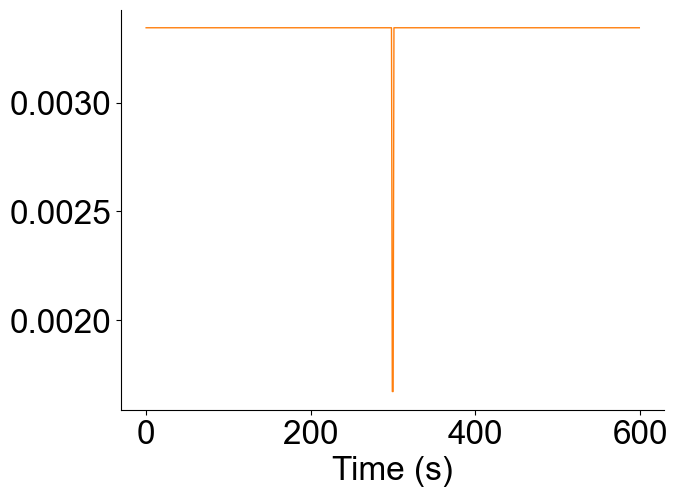

In [25]:
#plot a line which looks like a inversted v shape with the peak in the center and plot the modulus of the slop of the line
line=np.linspace(0,1,300)
line=np.concatenate((line,line[::-1]))
fig,ax=plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
#plt.plot(line,color="#83bb03",linewidth=3)
plt.plot(np.abs(np.gradient(line)),color="#ff7f0e",linewidth=1)
ax.set_xlabel("Time (s)")

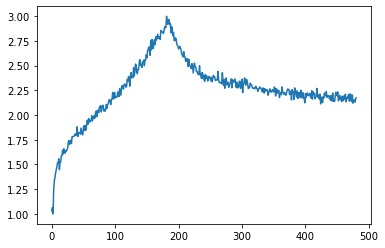

In [15]:
#Test set for the light track experiment to measure the itensity per unit area fraction
testdata=pd.read_csv(glob.glob(r"H:\PHD_data\Imaging_et_analysis\Sp5imaging\Pipettes\11_nov\26112021\Pos010\*Ligh*csv")[0])
testdata=testdata.drop(481)
plt.plot((testdata["%Area"]/np.min(testdata["%Area"])))


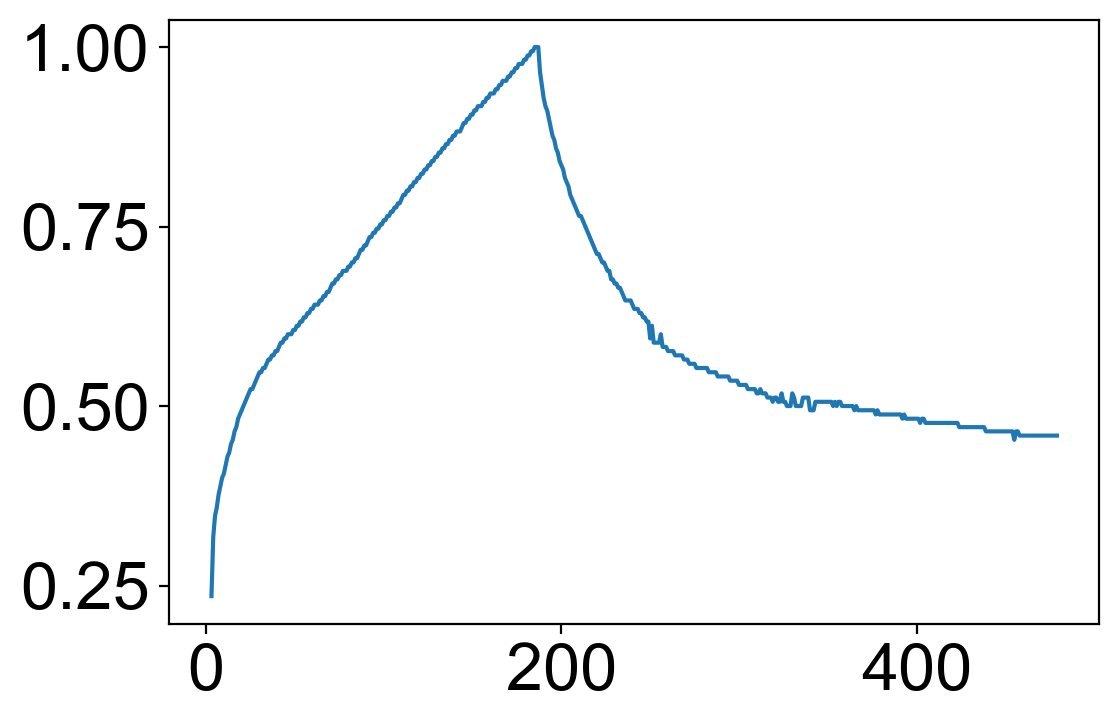

In [104]:
microndata=pd.read_csv(glob.glob(r"H:\PHD_data\Imaging_et_analysis\Sp5imaging\Pipettes\11_nov\26112021\Pos010\*Dark*")[0])
plt.plot((microndata["microns"]/np.max(microndata["microns"]))[3:])

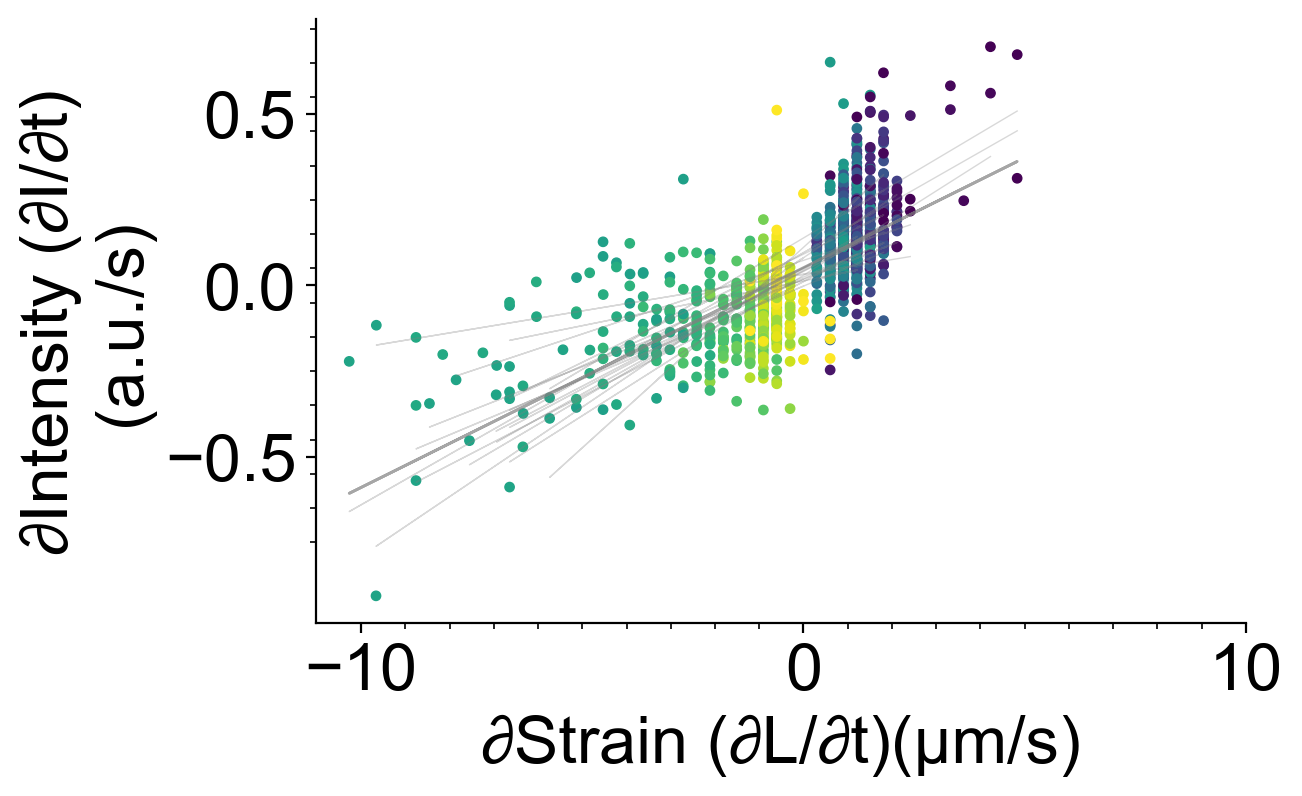

In [237]:
from sklearn.linear_model import LinearRegression
slope=[]
strainIntenssitydict={}
delIST=[]
dataDelIdelSt=pd.DataFrame(columns=["ID","delI","delL"])
for index in range(len(darkfiles)):
    pos="P"+str(darkfiles[index][darkfiles[index].find(r"os"):darkfiles[index].find(r"os")+5])
    date=darkfiles[index][darkfiles[index].find(r"_nov")+5:darkfiles[index].find(r"_nov")+13]
    darkdf=pd.read_csv(darkfiles[index],delimiter="[;,,]",engine="python")
    darkdfmax=darkdf["microns"].idxmax()
    darkdf=darkdf["microns"][darkdfmax-150:darkdfmax+120].reset_index(drop=True)
    
    straindf=np.gradient(darkdf[::5])
    #for index in range(len(darkdf)):
        #if index>=1:
            #straindf.append(darkdf[index]-darkdf[index-1])
    
    #plt.plot(np.abs(straindf))
    #plt.title(pos)
    #plt.show()
    for file in lightfiles:
            if pos in file:
                lightdf=pd.read_csv(file,delimiter="[;,,]",engine="python")
                lightdf=lightdf[1::2].reset_index(drop=True)
                lightdfmax=lightdf["Mean"].idxmax()
                lightdf=lightdf["Mean"][lightdfmax-150:lightdfmax+120].reset_index(drop=True)
                delI=np.gradient(lightdf[::5])
                #for index in range(len(lightdf)):
                    #if index>=1:
                        #delI.append(lightdf[index]-lightdf[index-1])
                delIST.append([[delI,straindf[x]] for x in range(len(delI)) ])
                ID=[pos+"_"+date]*len(delI)
                dataDelIdelSt=pd.concat([dataDelIdelSt,pd.DataFrame({"ID":ID,"delI":delI,"delL":straindf})],ignore_index=True)
                #plt.plot(delI,color="chartreuse")
                #plt.plot(lightdf/np.max(lightdf),color="orange")
                #plt.title("Keratin/strain_"+pos)
                #plt.show()
                #fit a linear regression to the strain vs change in intensity
                model=LinearRegression()
                model.fit(straindf.reshape(-1,1),delI)
                slope.append(model.coef_[0])
                fit_value=model.intercept_
                r_squared=model.score(straindf.reshape(-1,1),delI)
                strainIntenssitydict[pos]=[straindf,delI]
                colormap_func = plt.colormaps['viridis']
                plt.scatter(straindf,delI,color=colormap_func(np.linspace(0.,1,len(straindf))),linewidths=0.5,s=45,alpha=1,marker=".")##83bb03colormap_func(np.linspace(0.3,1,len(straindf)))
                plt.plot(straindf,model.predict(straindf.reshape(-1,1)),color="grey",linewidth=0.5,alpha=0.3)
                 # Add the slope, fit value, and R-squared value as text to the graph
                #plt.text(0.05, 0.95, f'Slope: {slope:.2f}\nFit value: {fit_value:.2f}\nR-squared: {r_squared:.2f}\nPos: {pos}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
                #plt.show()
                break

#fitting all the data together
model.fit(dataDelIdelSt["delL"].values.reshape(-1,1),dataDelIdelSt["delI"].values)
plt.plot(dataDelIdelSt["delL"],model.predict(dataDelIdelSt["delL"].values.reshape(-1,1)),color="gray",linewidth=1,alpha=0.7)
slopemean=model.coef_[0]
slopestd=model.score(dataDelIdelSt["delL"].values.reshape(-1,1),dataDelIdelSt["delI"].values)
plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.xticks(np.arange(-10,11,1),minor=True)
plt.yticks(np.arange(-0.75,0.76,0.1),minor=True)
plt.xlabel("∂Strain (∂L/∂t)(μm/s)")
plt.ylabel("∂Intensity (∂I/∂t)\n(a.u./s)")
outputfolder="H:\\PHD_data\\Imaging_et_analysis\\PaperFigures\\Figure2\\Pipettes\\"+date+"\\StrainIntensity\\"
if not os.path.isdir(outputfolder):
    os.makedirs(outputfolder)
pd.DataFrame.from_dict(strainIntenssitydict).to_csv("H:\\PHD_data\\Imaging_et_analysis\\Sp5imaging\\Pipettes\\11_nov\\26112021\\StrainIntensity.csv",index=False)
#plt.text(0.05, 0.95, f'Slope: {slopemean:.2f} ', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')#\nRsquared: {slopestd:.2f}
plt.savefig(outputfolder+"StrainIntensity.png",bbox_inches='tight',dpi=300, transparent=True)
plt.savefig(outputfolder+"StrainIntensity.svg",bbox_inches='tight',dpi=300, transparent=True)
plt.savefig(outputfolder+"StrainIntensity.pdf",bbox_inches='tight',dpi=300, transparent=True)
plt.show()

In [142]:
np.zeros((4,10))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

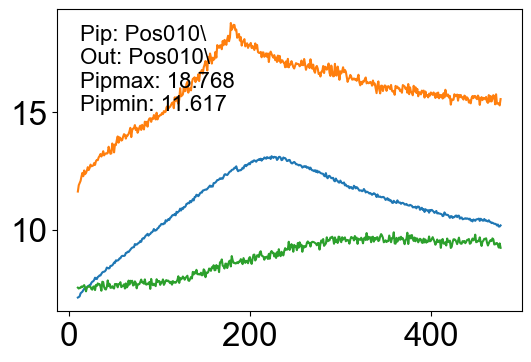

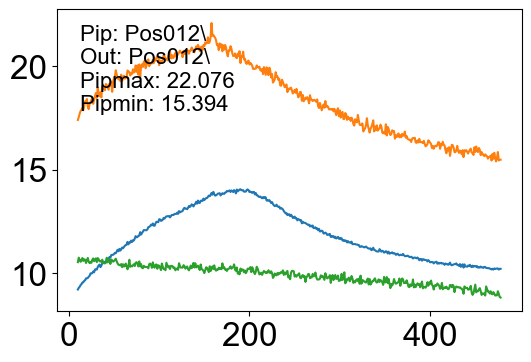

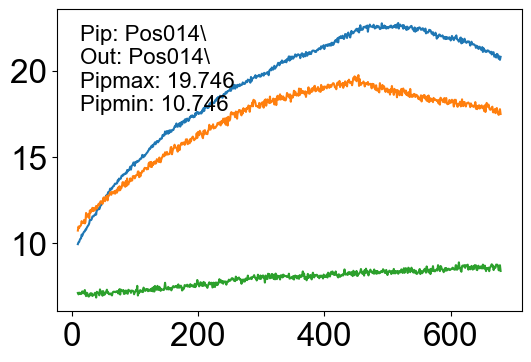

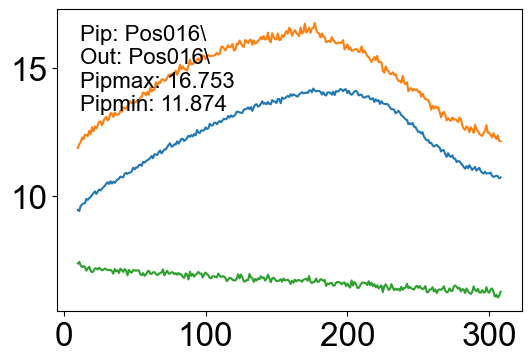

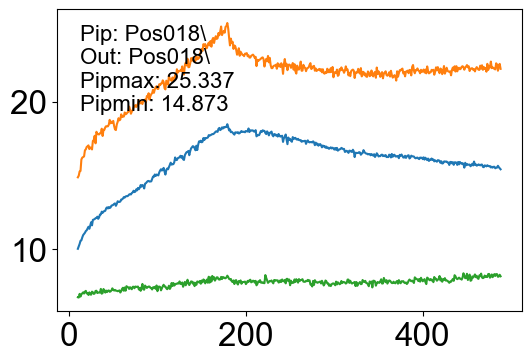

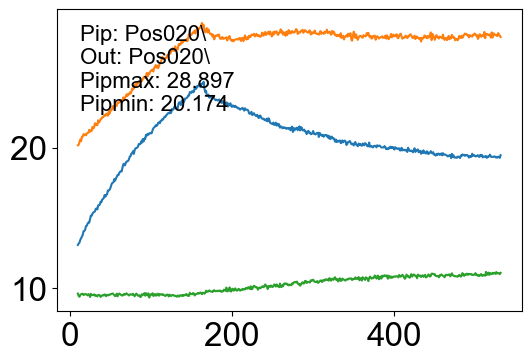

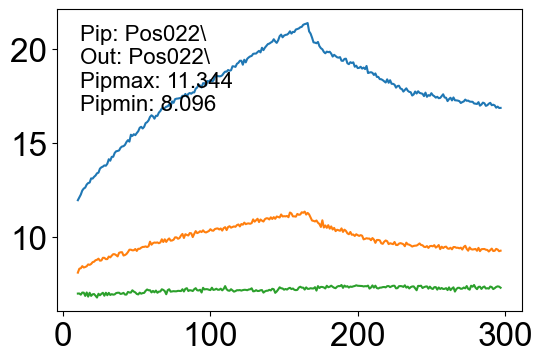

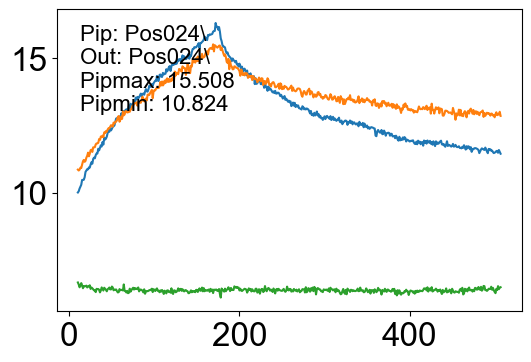

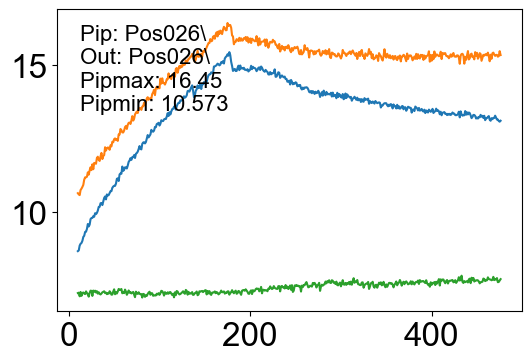

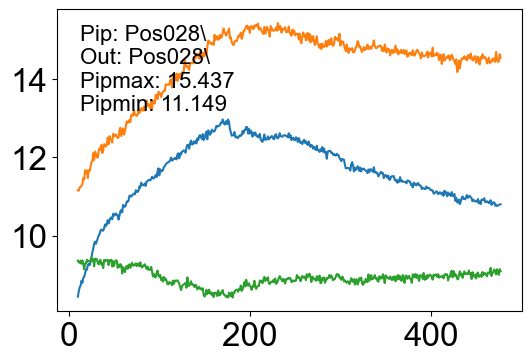

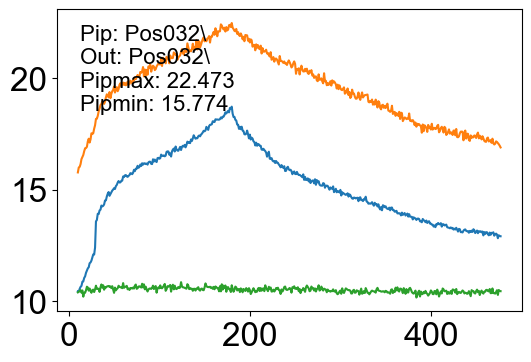

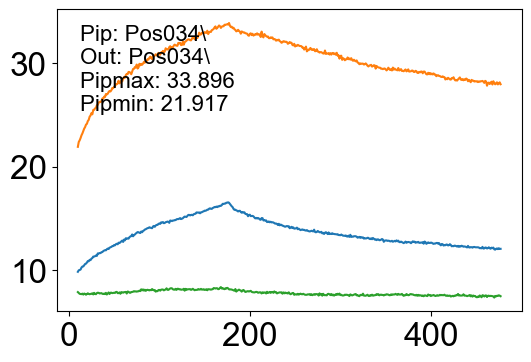

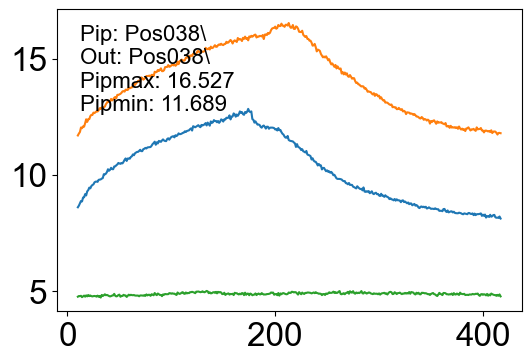

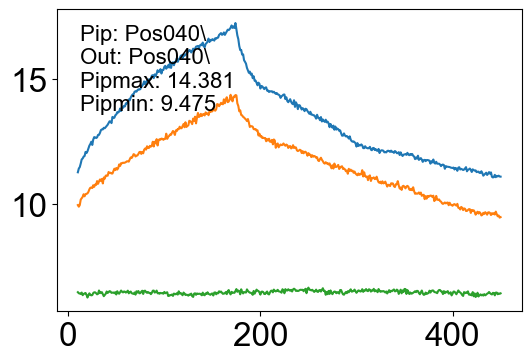

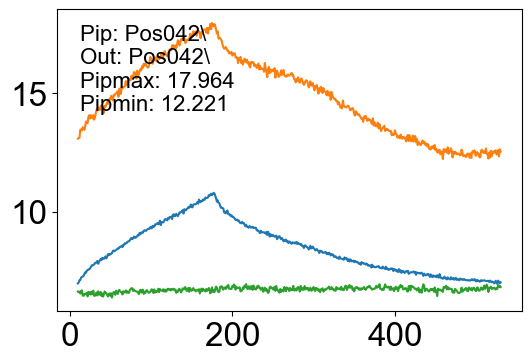

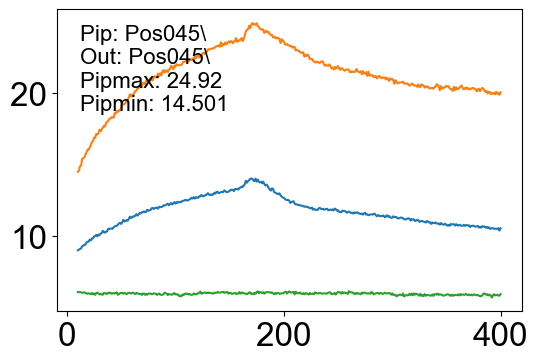

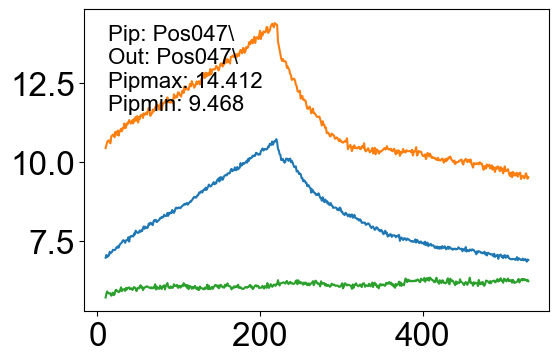

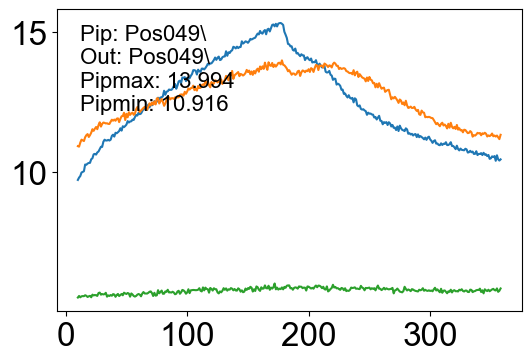

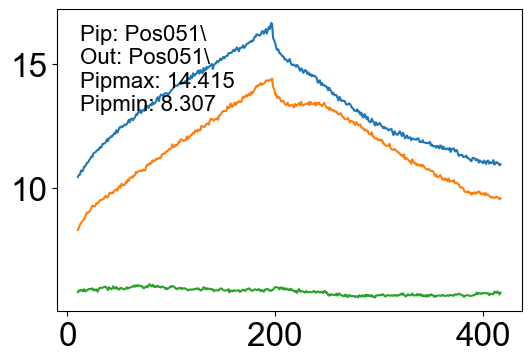

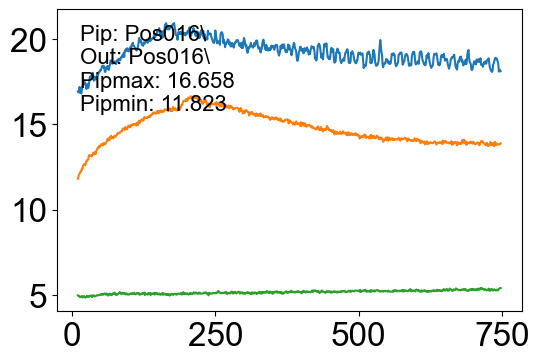

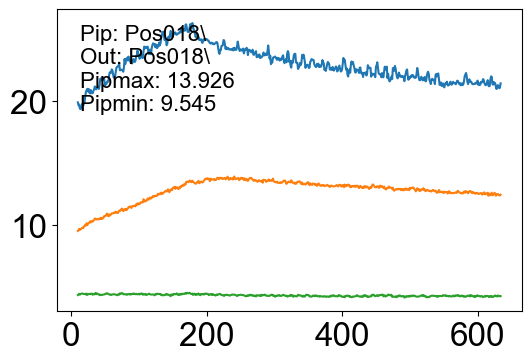

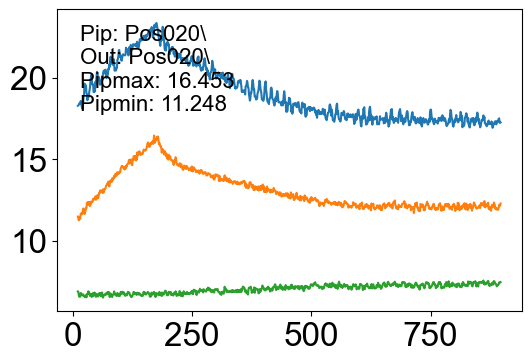

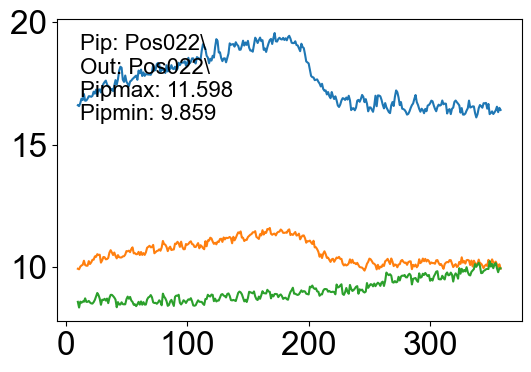

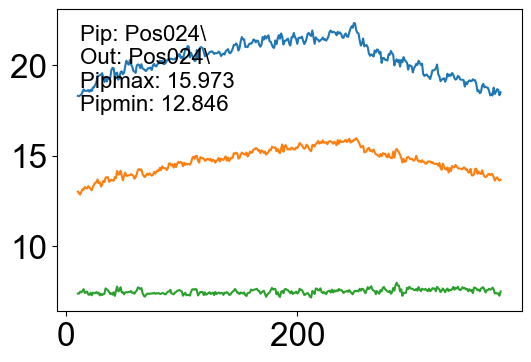

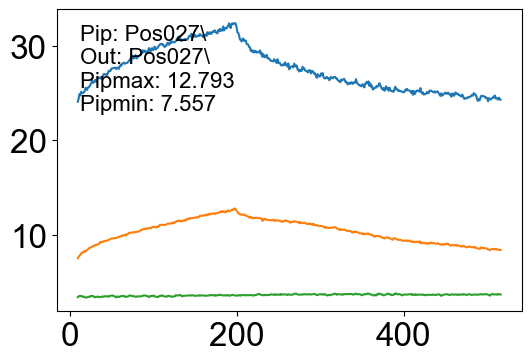

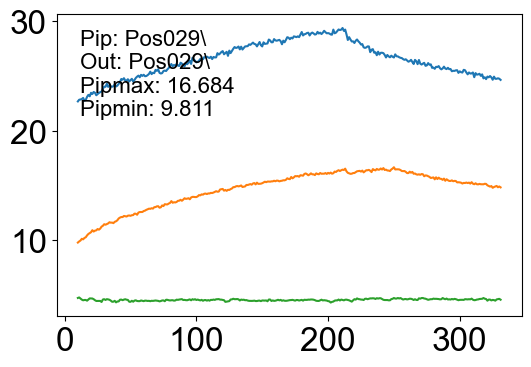

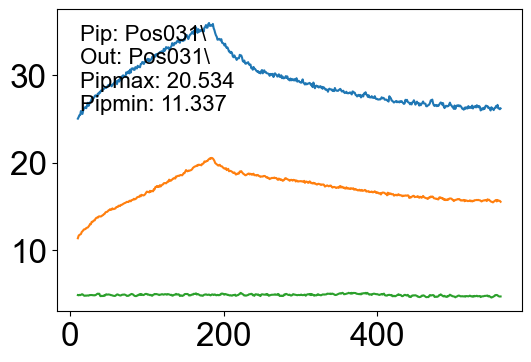

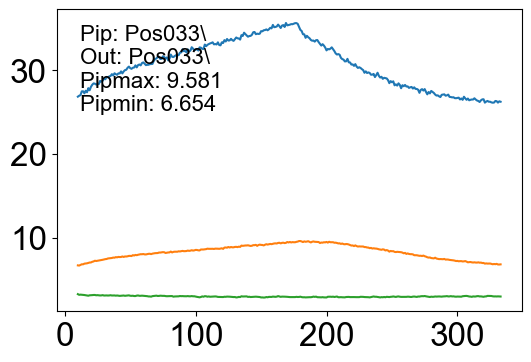

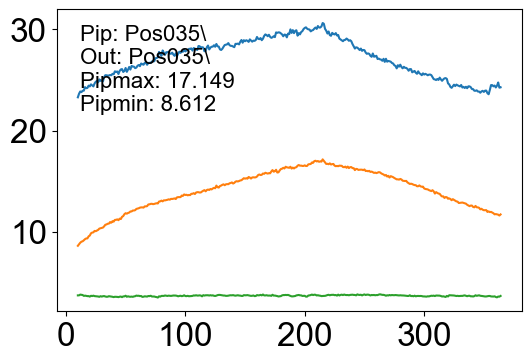

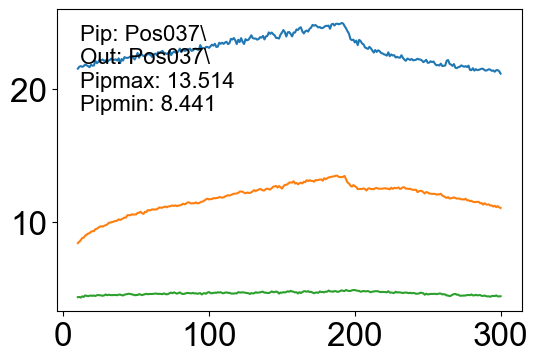

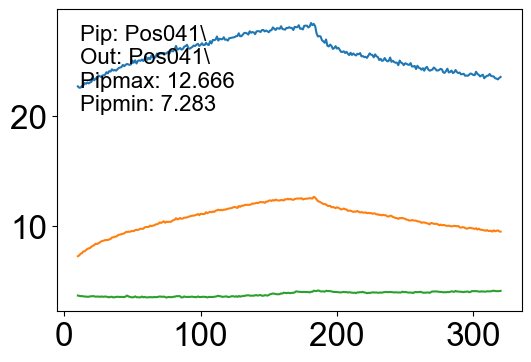

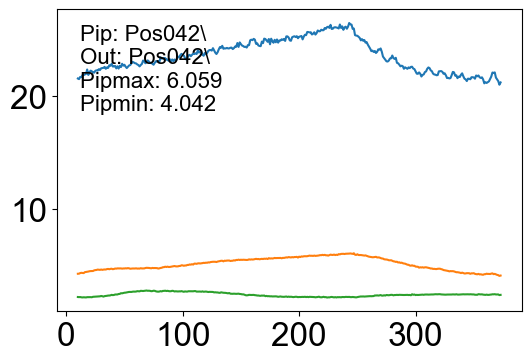

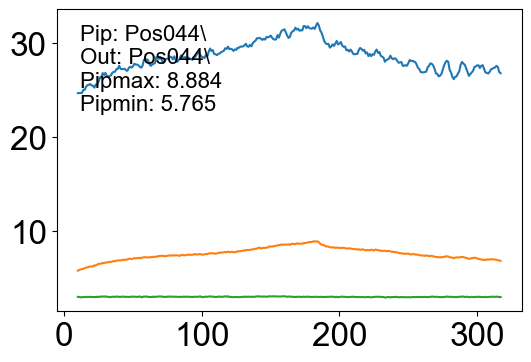

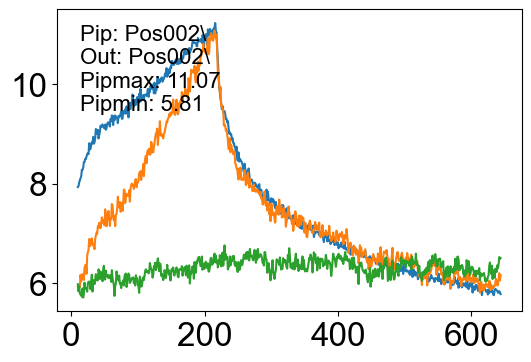

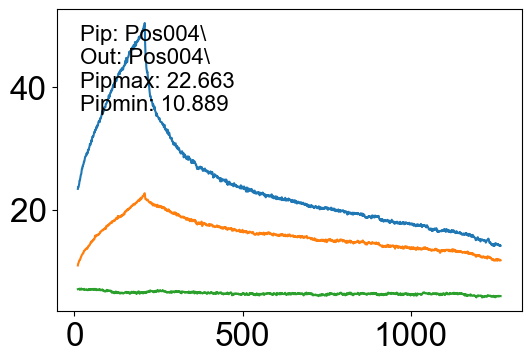

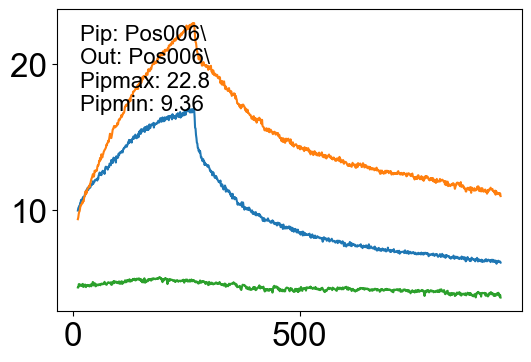

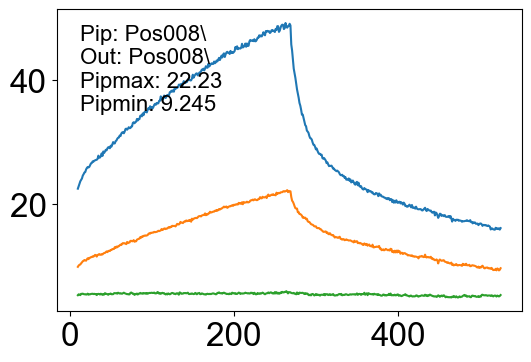

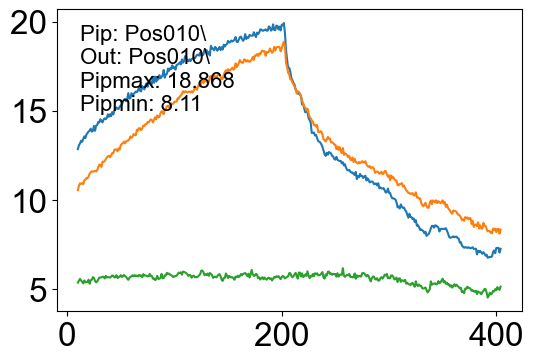

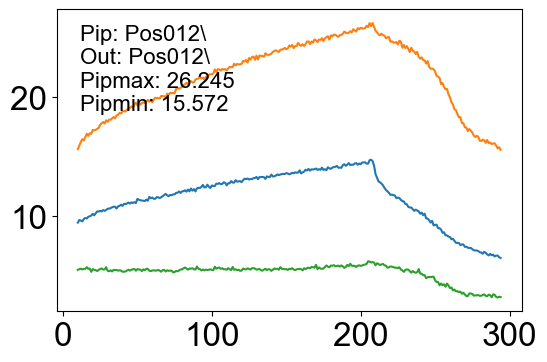

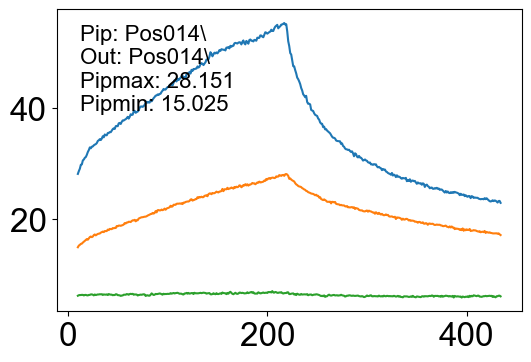

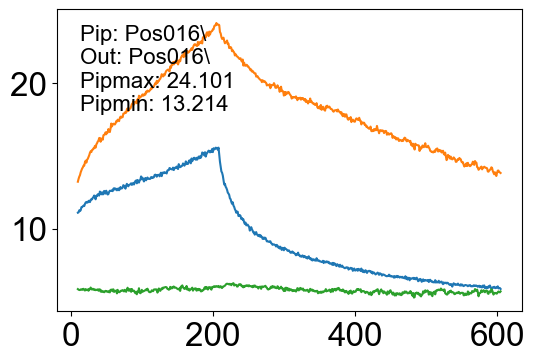

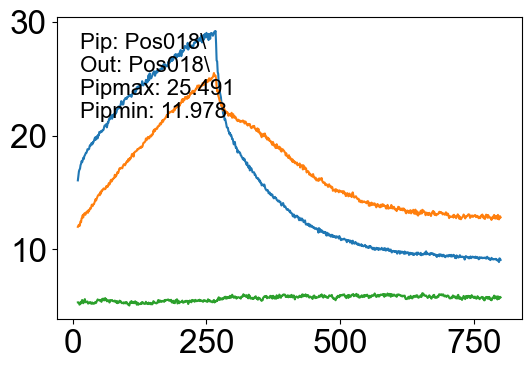

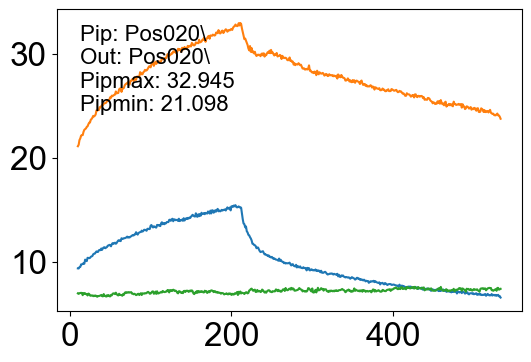

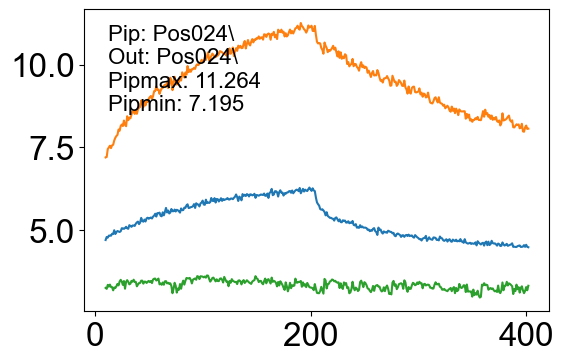

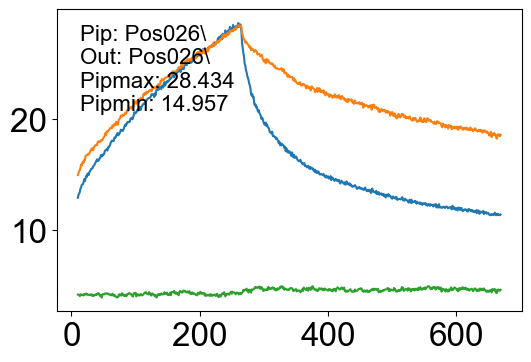

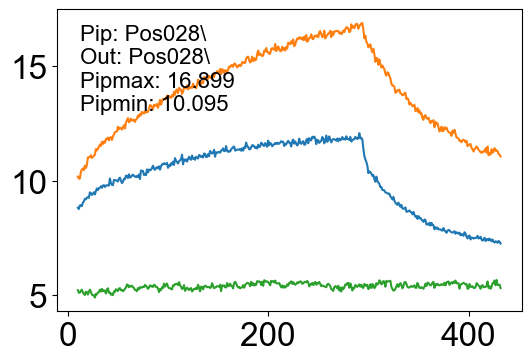

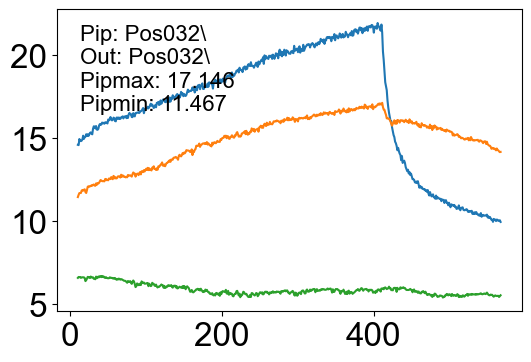

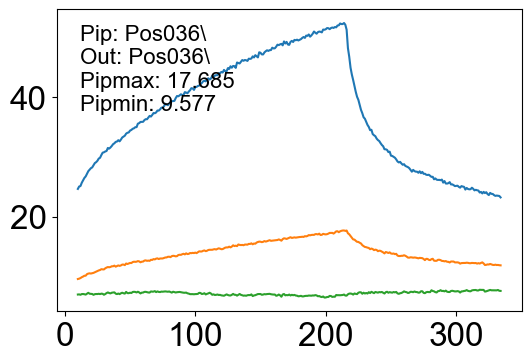

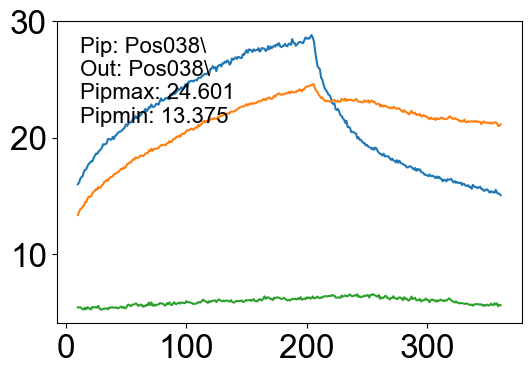

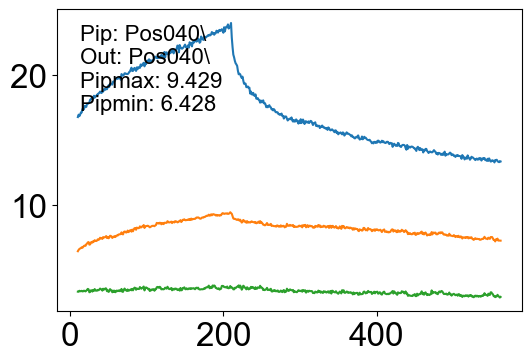

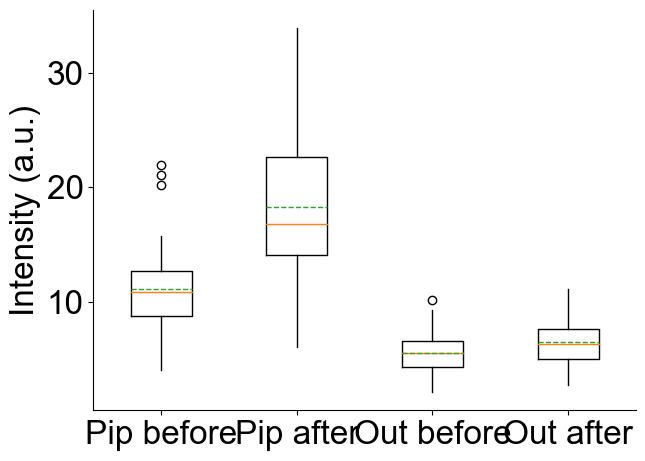

In [192]:
folder1="H:\\PHD_data\\Imaging_et_analysis\\Sp5imaging\\Pipettes\\11_nov\\26112021\\"
folder2="H:\\PHD_data\\Imaging_et_analysis\\Sp5imaging\\Pipettes\\11_nov\\24112021\\"
folder3="H:\\PHD_data\\Imaging_et_analysis\\Sp5imaging\\Pipettes\\11_nov\\15112021\\"

def KeratinboxPlots(folders=[folder1,folder2,folder3]):
    lendata = 0
    for folder in folders:
        lendata += len(glob.glob(folder+"\\*\\*Pip*.csv"))
    data=np.zeros((4,lendata-2))
    current_index = 0
    
    for folder in folders:
        pipfiles=glob.glob(folder+"\\*\\*Pip*.csv")
        outfiles=glob.glob(folder+"\\*\\*Out*.csv")
        for pipfile in pipfiles:
            pos=pipfile[pipfile.find("os")-1:pipfile.find("os")+7]
            for outfile in outfiles:
                if pos in outfile:
                    pipdf=pd.read_csv(pipfile,delimiter="[;,,]",engine="python")
                    plt.plot(pipdf[::2].reset_index(drop=True)["Mean"][10:])
                    plt.plot(pipdf[1::2].reset_index(drop=True)["Mean"][10:])
                    pipdf=pipdf[1::2].reset_index(drop=True)[10:]
                    
                    outdf=pd.read_csv(outfile,delimiter="[;,,]",engine="python")
                    outdf=outdf[1::2].reset_index(drop=True)[10:]
                    pipmax=np.max(pipdf["Mean"])
                    pipmin=np.min(pipdf["Mean"])
                    outmax=np.max(outdf["Mean"])
                    outmin=np.min(outdf["Mean"])
                    plt.text(0.05, 0.95, f'Pip: {pipfile[pipfile.find("os")-1:pipfile.find("os")+6]} \nOut: {outfile[outfile.find("os")-1:outfile.find("os")+6]} \nPipmax: {pipmax} \nPipmin: {pipmin}', transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')
                    plt.plot(outdf["Mean"])
                    plt.show()
                    
                    # update data array with current index
                    data[1,current_index]=pipmax
                    data[0,current_index]=pipmin
                    data[3,current_index]=outmax
                    data[2,current_index]=outmin
                    current_index += 1
    fig,ax=plt.subplots(figsize=(7, 5.3),sharey=True)
    plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
    plt.rcParams['font.size'] = 24
    plt.rcParams['savefig.dpi'] = 300
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    plt.boxplot(data.T,showcaps=False,showmeans=True,meanline=True)
    ax.set_xticklabels(["Pip before","Pip after","Out before","Out after"])
    ax.set_ylabel("Intensity (a.u.)")
    #plt.savefig(folder+"\\KeratinboxPlots.png",bbox_inches='tight',dpi=300, transparent=True)
    plt.show()
    return data

data=KeratinboxPlots([folder1,folder2,folder3])

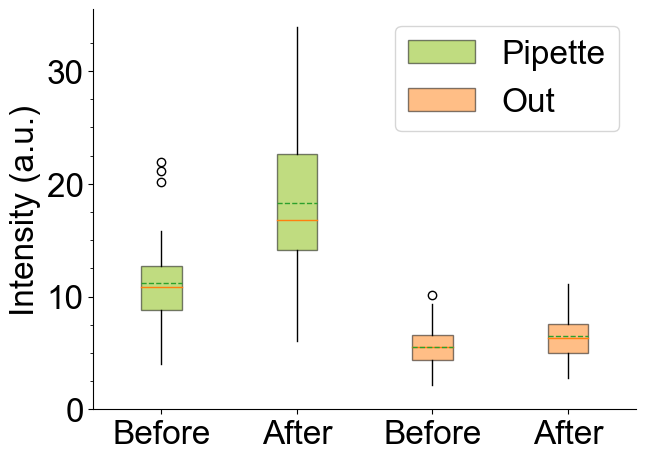

In [205]:
outputfolder="H:\\PHD_data\\Imaging_et_analysis\\PaperFigures\\Figure2\\Pipettes\\"+"AspirationBoxplot\\"
if not os.path.isdir(outputfolder):
    os.makedirs(outputfolder)
#figure box plot and save data as a csv with headings as the experiment name
fig,ax=plt.subplots(figsize=(7, 5.3),sharey=True)
labels=["Pipette","Pipette","Out","Out"]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
bplot=plt.boxplot(data.T,showcaps=False,showmeans=True,meanline=True,patch_artist=True,labels=labels,widths=0.3)

ax.set_xticklabels(["Before","After","Before","After"])
ax.set_ylabel("Intensity (a.u.)")
colors=["#83bb03","#83bb03","#ff7f0e","#ff7f0e"]
for bplo in bplot:
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.5)
plt.legend([bplot["boxes"][0],bplot["boxes"][2]],["Pipette","Out"],loc="upper right")
plt.yticks(np.arange(0,35,2.5),minor=True)
plt.savefig(outputfolder+"KeratinboxPlots.png",bbox_inches='tight',dpi=300, transparent=True)
plt.savefig(outputfolder+"KeratinboxPlots.svg",bbox_inches='tight',dpi=300, transparent=True)
plt.savefig(outputfolder+"KeratinboxPlots.pdf",bbox_inches='tight',dpi=300, transparent=True)
plt.show()
pd.DataFrame(data.T,columns=["Pipette before","Pipette after","Out before","Out after"]).to_csv(outputfolder+"KeratinboxPlots.csv",index=False)

Position:Pos002 lenStrain:270
Position:Pos002 delIntensity:90 delD:90
Position:Pos004 lenStrain:270
Position:Pos004 delIntensity:90 delD:90
Position:Pos006 lenStrain:270
Position:Pos006 delIntensity:90 delD:90
Position:Pos008 lenStrain:270
Position:Pos008 delIntensity:90 delD:90
Position:Pos010 lenStrain:270
Position:Pos010 delIntensity:90 delD:90
Position:Pos012 lenStrain:240
Position:Pos012 delIntensity:80 delD:80
Position:Pos014 lenStrain:248
Position:Pos014 delIntensity:90 delD:83


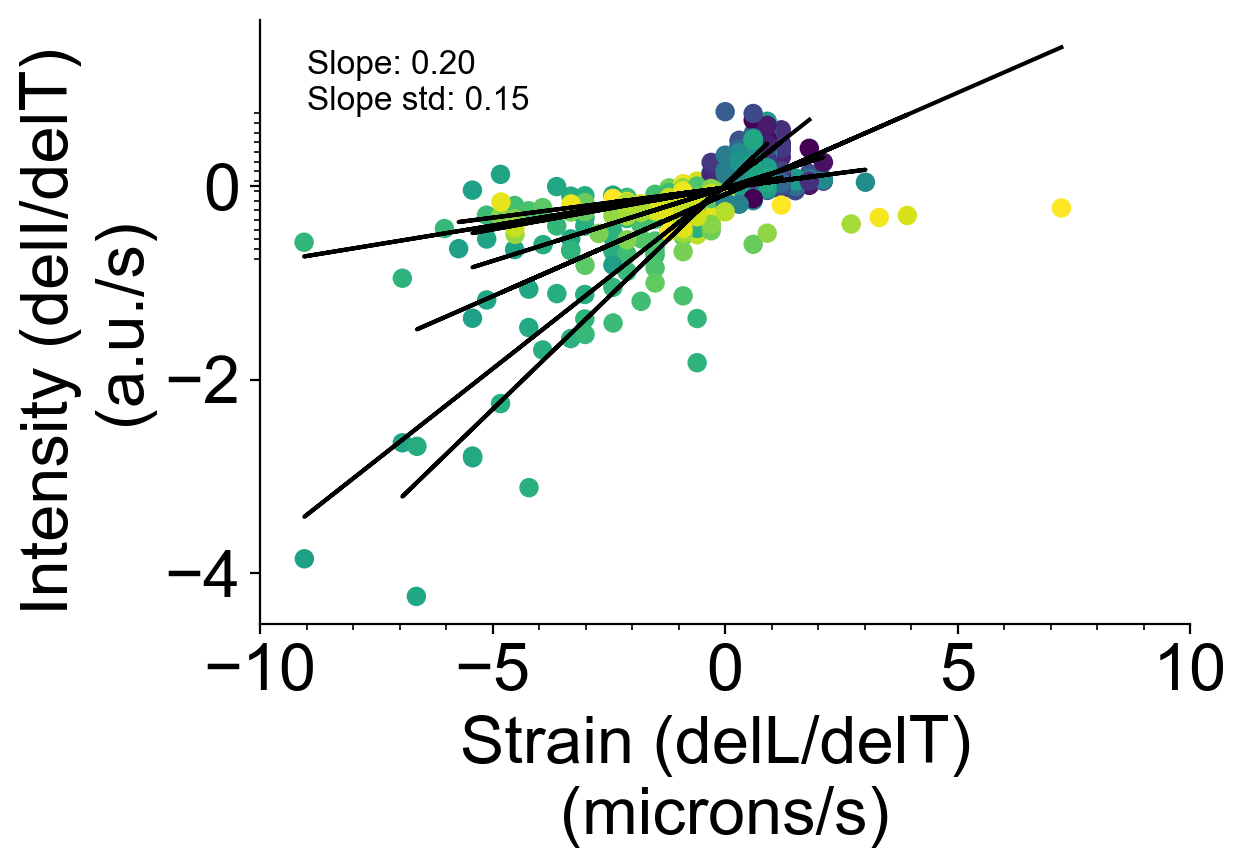

In [102]:
#function to plot the strain vs delIntensity for the 3sets of data contained in light files 1-3 and dark files 1-3
def plotStrainIntensity(lightfiles,darkfiles):
    slope=[]
    strainIntenssitydict={}
    for index in range(len(darkfiles)):
        pos="P"+str(darkfiles[index][darkfiles[index].find(r"os"):darkfiles[index].find(r"os")+5])
        darkdf=pd.read_csv(darkfiles[index],delimiter="[;,,]",engine="python")
        darkdfmax=darkdf["microns"].idxmax()
        darkdf=darkdf["microns"][darkdfmax-150:darkdfmax+120].reset_index(drop=True)
        print("Position:{pos} lenStrain:{maxstrain}".format(pos=pos,maxstrain=len(darkdf))) 
        straindf=np.gradient(darkdf[::3])
        #for index in range(len(darkdf)):
         #if index>=1:
               #straindf.append(darkdf[index]-darkdf[index-1])
    
        #plt.plot(np.abs(straindf))
        #plt.title(pos)
        #plt.show()
        for file in lightfiles:
                if pos in file:
                    lightdf=pd.read_csv(file,delimiter="[;,,]",engine="python")
                    lightdf=lightdf[::2].reset_index(drop=True)
                    lightdfmax=lightdf["Mean"].idxmax()
                    lightdf=lightdf["Mean"][lightdfmax-150:lightdfmax+120].reset_index(drop=True)
                    delI=np.gradient(lightdf[::3])
                    print("Position:{pos} delIntensity:{lendelintensity} delD:{st}".format(pos=pos,lendelintensity=len(delI),st=len(straindf)))
                    #for index in range(len(lightdf)):
                        #if index>=1:
                            #delI.append(lightdf[index]-lightdf[index-1])
                    #delISt=[[delI[x],straindf[x]] for x in range(len(delI)) ]
                    #plt.plot(delI,color="chartreuse")
                    #plt.plot(lightdf/np.max(lightdf),color="orange")
                    #plt.title("Keratin/strain_"+pos)
                    #plt.show()
                    #fit a linear regression to the strain vs change in intensity
                    model=LinearRegression()
                    model.fit(straindf.reshape(-1,1),delI[:len(straindf)])
                    slope.append(model.coef_[0])
                    #fit_value=model.intercept_
                    #r_squared=model.score(straindf.reshape(-1,1),delI)
                    strainIntenssitydict[pos]=[straindf,delI]
                    colormap_func = plt.colormaps['viridis']
                    plt.scatter(straindf,delI[:len(straindf)],color=colormap_func(np.linspace(0,1,len(straindf))))
                    plt.plot(straindf,model.predict(straindf.reshape(-1,1)),color="black")
                    # Add the slope, fit value, and R-squared value as text to the graph
                    #plt.text(0.05, 0.95, f'Slope: {slope:.2f}\nFit value: {fit_value:.2f}\nR-squared: {r_squared:.2f}\nPos: {pos}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
                    #plt.show()
                    break                   
    outputfolder=darkfiles[0][:darkfiles[0].find(r"Pos")]+r"Analysis\\StrainIntensity\\"
    if not os.path.isdir(outputfolder):
        os.makedirs(outputfolder)
    slopemean=np.mean(slope)
    slopestd=np.std(slope)
    plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower
    plt.rcParams['font.size'] = 24
    plt.rcParams['savefig.dpi'] = 300
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    plt.xticks(np.arange(-10,11,1),minor=True)
    plt.yticks(np.arange(-0.75,0.76,0.1),minor=True)

    plt.xlabel("Strain (delL/delT) \n(microns/s)")
    plt.ylabel("Intensity (delI/delT) \n(a.u./s)")
    pd.DataFrame.from_dict(strainIntenssitydict).to_csv(outputfolder+"StrainIntensity.csv",index=False)
    plt.text(0.05, 0.95, f'Slope: {slopemean:.2f}\nSlope std: {slopestd:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
    plt.savefig(outputfolder+"StrainIntensity.png",bbox_inches='tight',dpi=300, transparent=True)
    plt.savefig(outputfolder+"StrainIntensity.svg",bbox_inches='tight',dpi=300, transparent=True)
    plt.savefig(outputfolder+"StrainIntensity.pdf",bbox_inches='tight',dpi=300, transparent=True)
    plt.show()  
#Folders for analysis
lightfiles=glob.glob(r"H:\PHD_data\Imaging_et_analysis\Sp5imaging\Pipettes\11_nov\26112021\Pos*\*Pip_*csv")
darkfiles=glob.glob(r"H:\PHD_data\Imaging_et_analysis\Sp5imaging\Pipettes\11_nov\26112021\Pos*\*Dark*csv")
lightfiles2=glob.glob(r"H:\PHD_data\Imaging_et_analysis\Sp5imaging\Pipettes\11_nov\24112021\Pos*\*Pip_*csv")
darkfiles2=glob.glob(r"H:\PHD_data\Imaging_et_analysis\Sp5imaging\Pipettes\11_nov\24112021\Pos*\*Dark*csv")
lightfiles3=glob.glob(r"H:\PHD_data\Imaging_et_analysis\Sp5imaging\Pipettes\11_nov\15112021\Pos*\*Pip_*csv")
darkfiles3=glob.glob(r"H:\PHD_data\Imaging_et_analysis\Sp5imaging\Pipettes\11_nov\15112021\Pos*\*Dark*csv")
#plot the strain vs delIntensity for the 3sets of data contained in light files 1-3 and dark files 1-3
#plotStrainIntensity(lightfiles,darkfiles)
#plotStrainIntensity(lightfiles2,darkfiles2)
plotStrainIntensity(lightfiles3,darkfiles3)

'H:\\PHD_data\\Imaging_et_analysis\\Sp5imaging\\Pipettes\\11_nov\\26112021\\Pos051\\ResKrtMemIntPip_Pos051.csv'

H:\PHD_data\Imaging_et_analysis\Sp5imaging\Pipettes\11_nov\26112021\Pos051\ResKrtMemIntTest_Pos051.csv


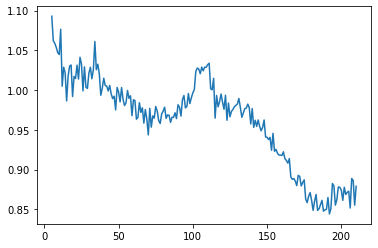

In [60]:
file=glob.glob(r"H:\PHD_data\Imaging_et_analysis\Sp5imaging\Pipettes\11_nov\26112021\Pos051\*test*")[0]
testdf=pd.read_csv(file,delimiter="[;,,]",engine="python")
testdf=testdf[::2].reset_index(drop=True)
print(file)
plt.plot(testdf["Mean"][5:]/testdf["%Area"][5:])

In [13]:
darkdf

35     57.9257
36     57.9257
37     58.5291
38     58.5291
39     59.1325
        ...   
300    54.3054
301    54.3054
302    54.3054
303    54.3054
304    54.3054
Name: microns, Length: 270, dtype: float64

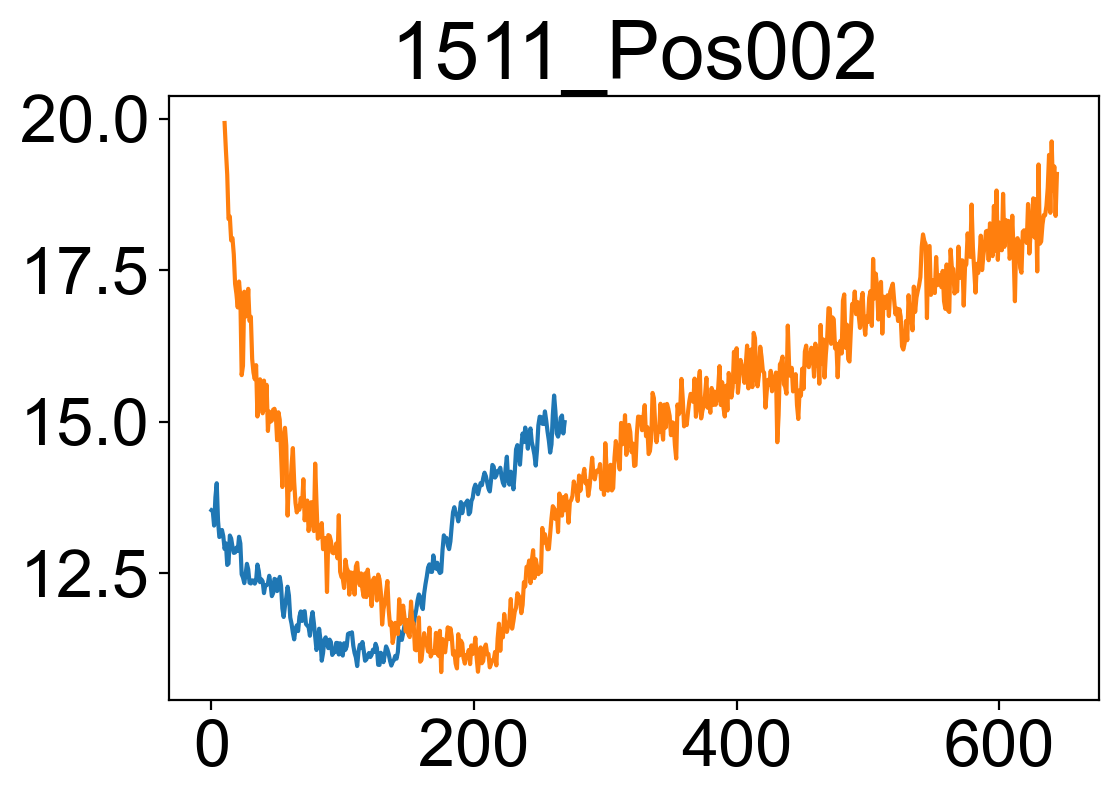

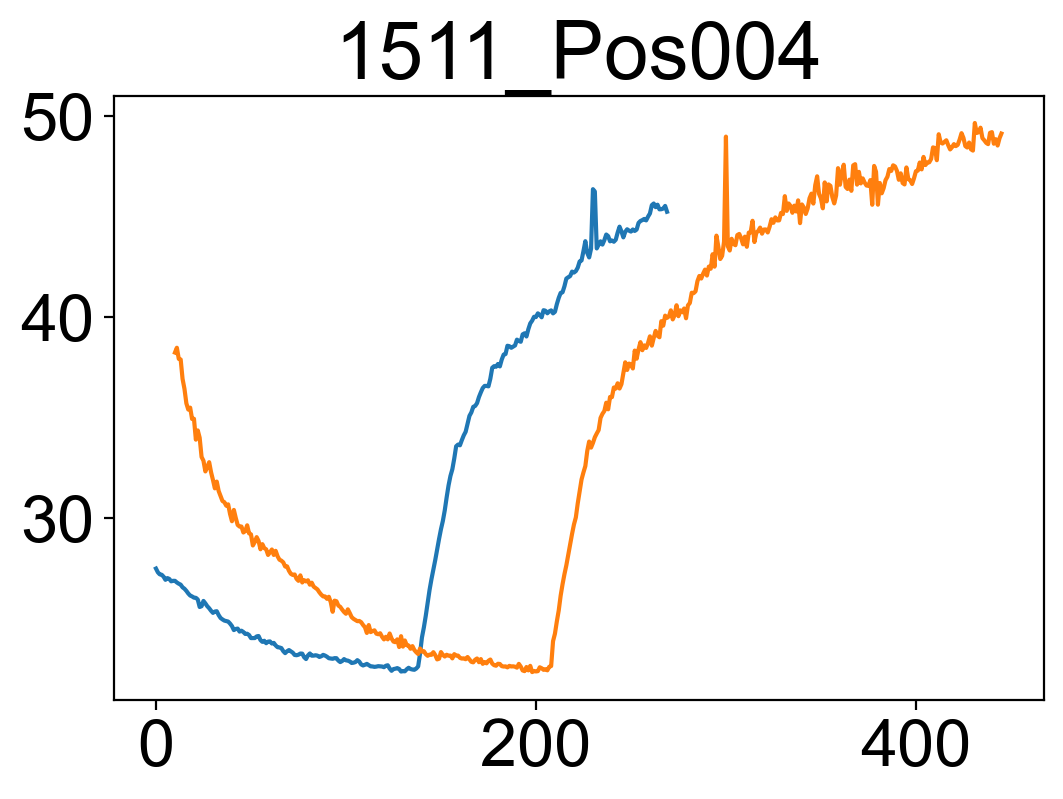

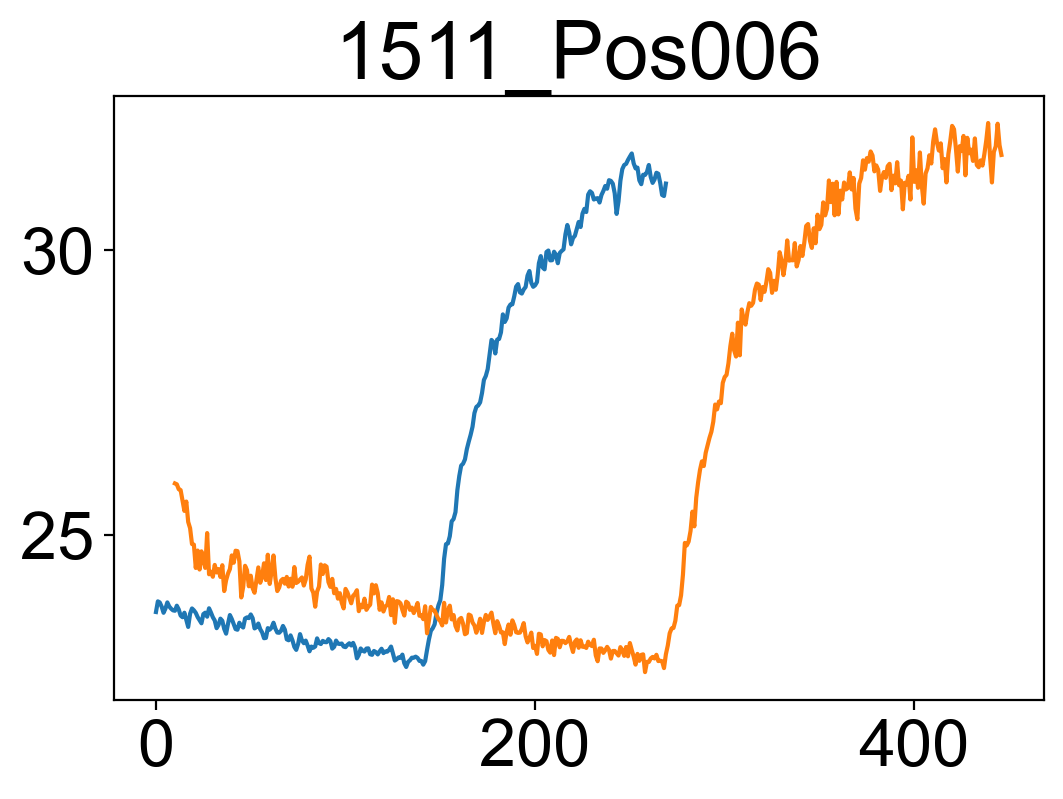

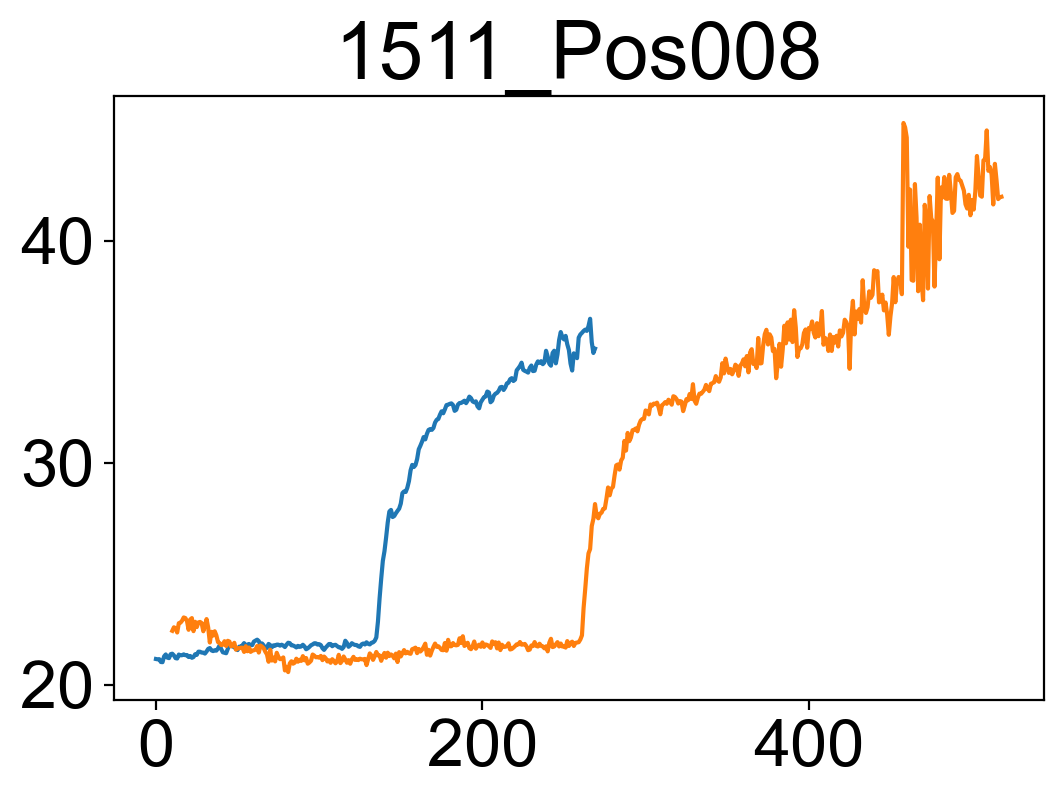

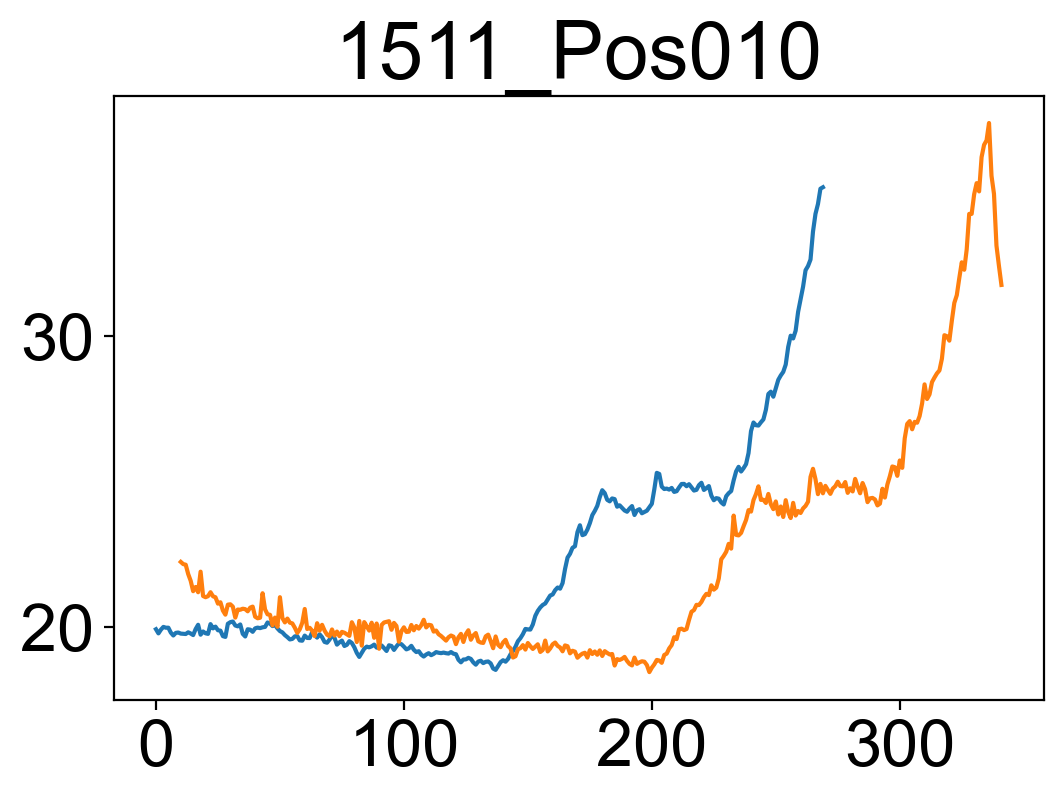

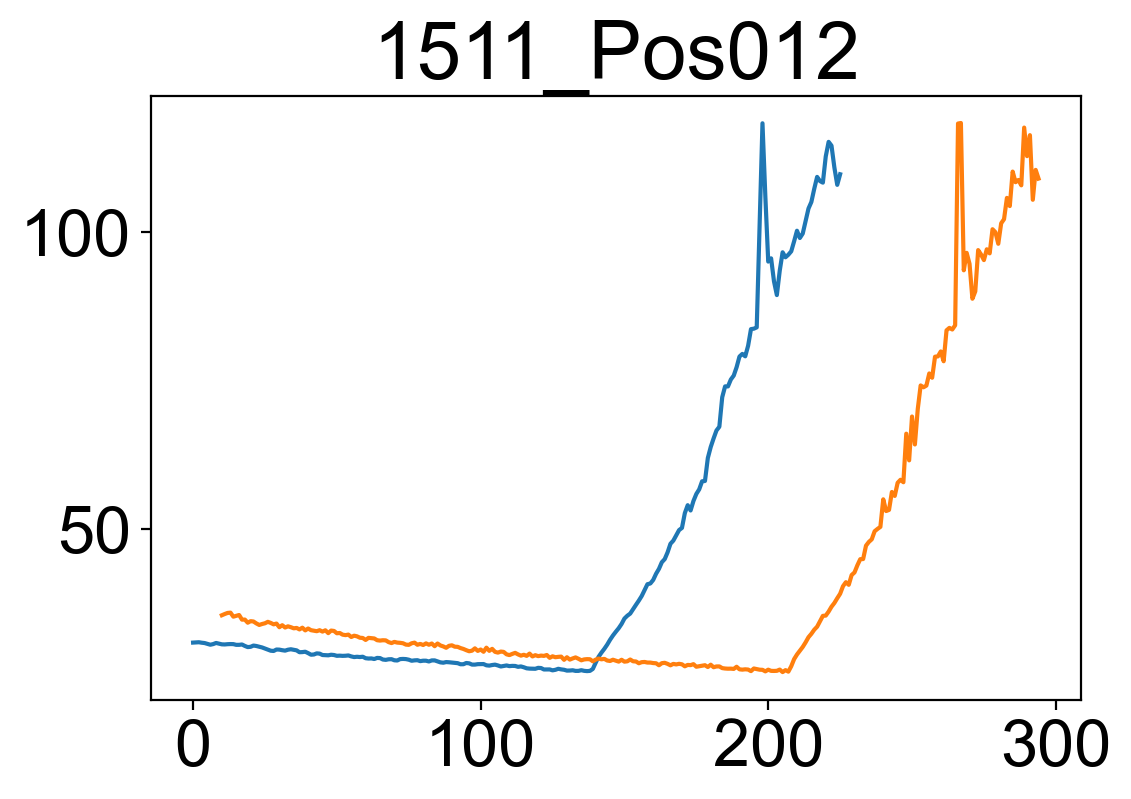

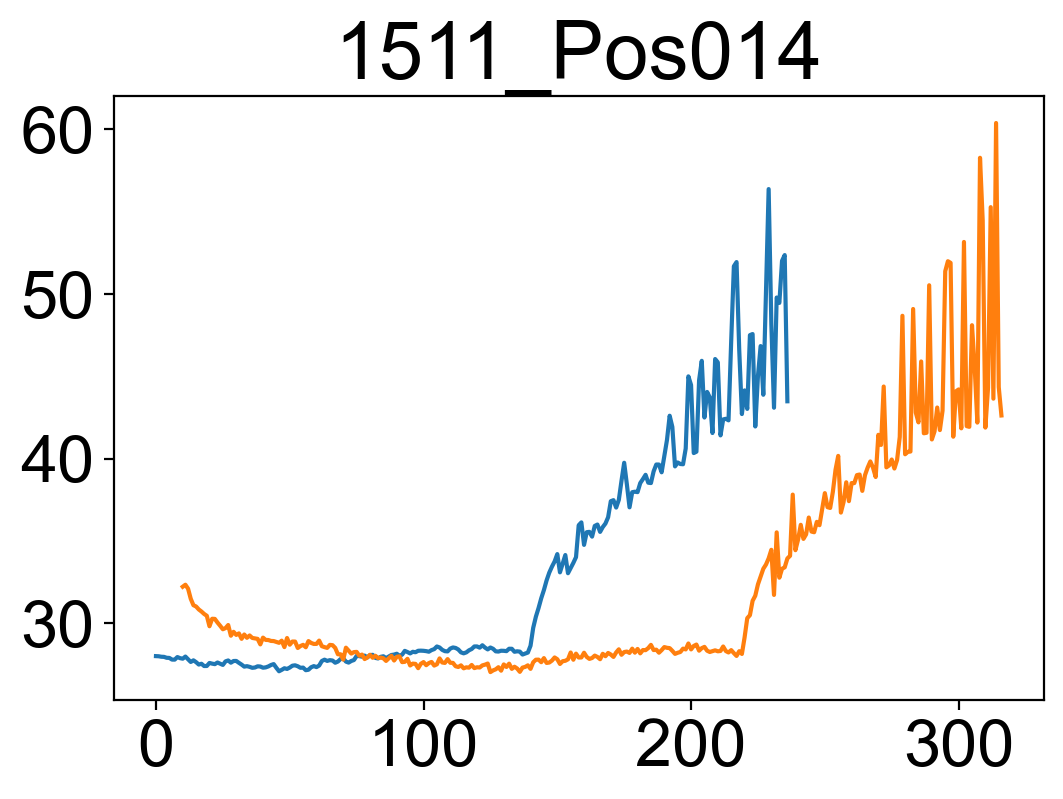

Pos002_1511_215  Pos004_1511_209  Pos006_1511_266  Pos008_1511_265  \
0          13.539505        27.484840        23.654515        21.149373   
1          13.524244        27.297935        23.841597        21.134587   
2          13.285863        27.194936        23.822318        21.143587   
3          13.752289        27.178545        23.748154        21.014462   
4          13.984949        27.081099        23.640938        21.006438   
..               ...              ...              ...              ...   
265        14.839573        45.358356        31.341136        36.148172   
266        15.065100        45.365762        31.179741        36.479278   
267        15.103181        45.397860        30.968885        35.425459   
268        14.806862        45.528704        30.949785        34.938038   
269        14.993307        45.238944        31.168338        35.134123   

     Pos010_1511_202  Pos012_1511_208  Pos014_1511_219  
0          19.922097        30.870384        28.017571  
1          19.779075        30.891602        28.009469  
2          19.908074        30.929558        27.980387  
3          20.002392        30.849745        27.972471  
4          19.974456        30.793935        27.916728  
..               ...              ...              ...  
265        33.586193              NaN              NaN  
266        34.196288              NaN              NaN  
267        34.533750              NaN              NaN  
268        35.060934              NaN              NaN  
269        35.110866              NaN              NaN  

[270 rows x 7 columns]

In [103]:
keratinNormalizedIntensity(lightfiles3,darkfiles3)

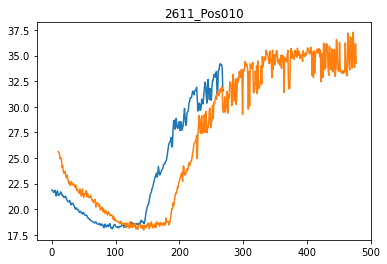

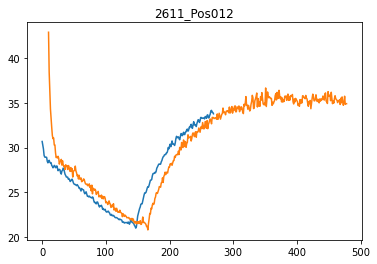

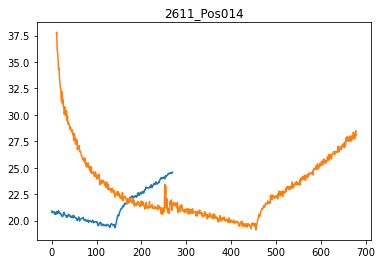

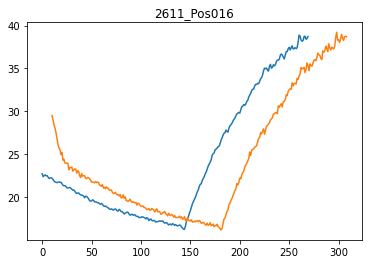

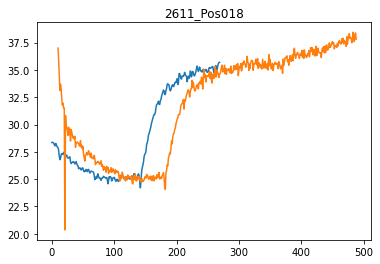

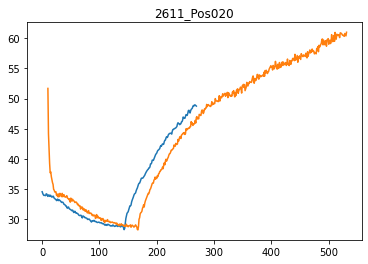

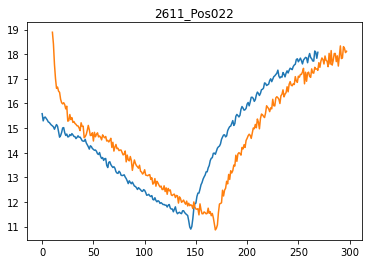

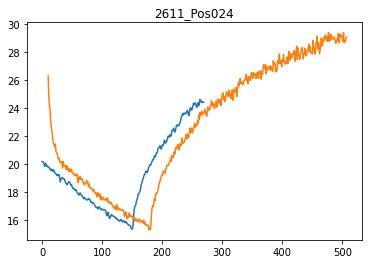

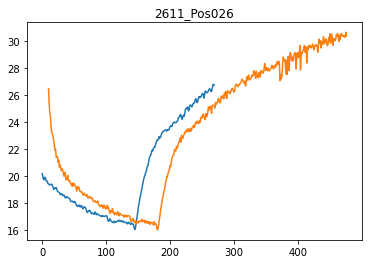

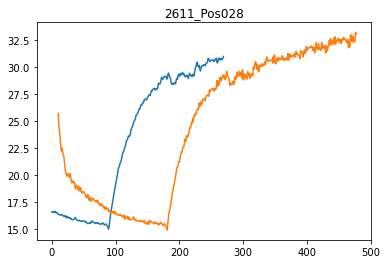

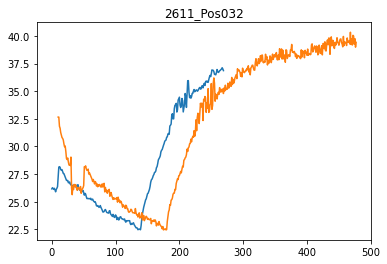

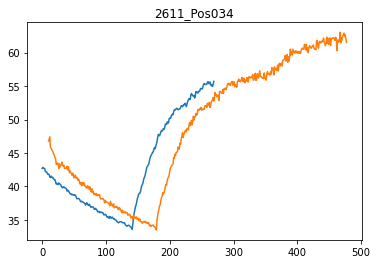

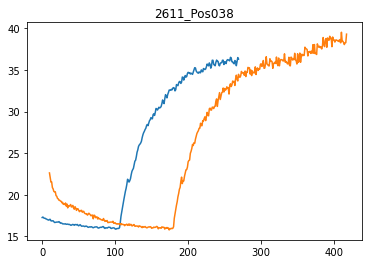

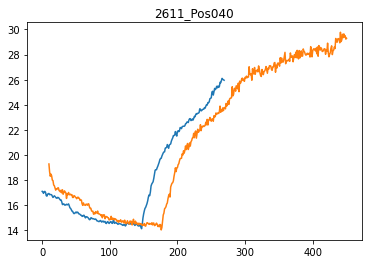

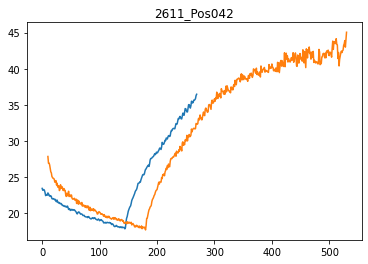

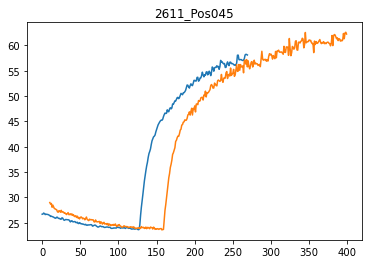

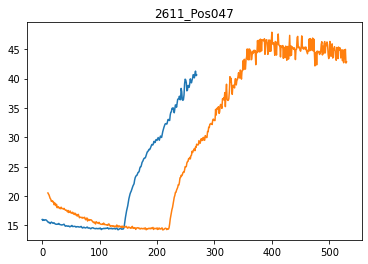

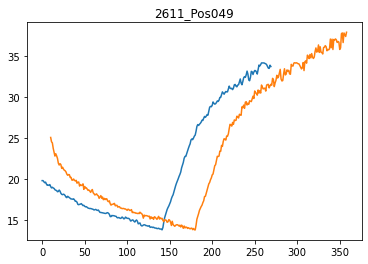

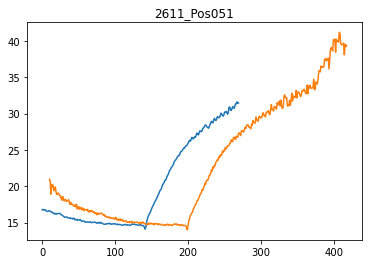

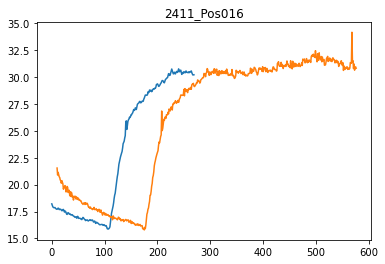

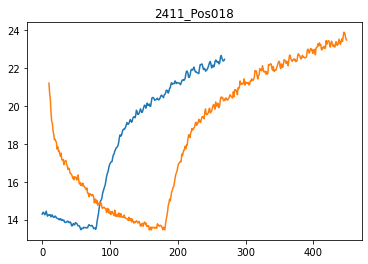

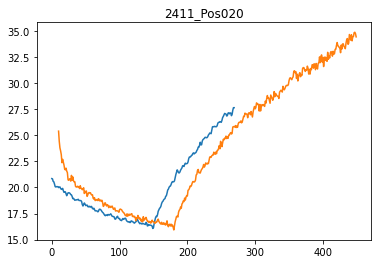

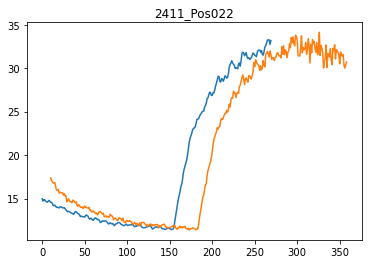

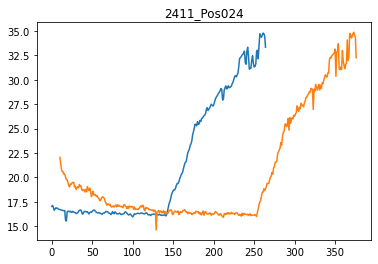

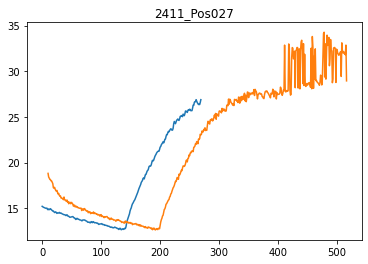

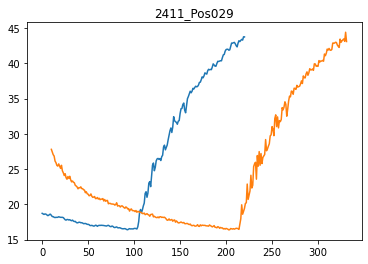

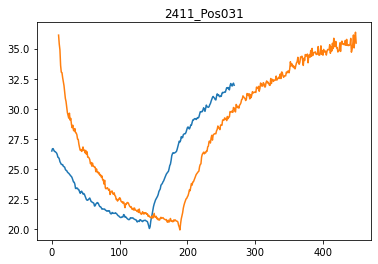

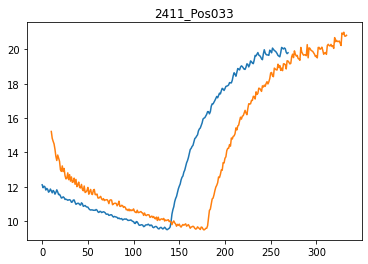

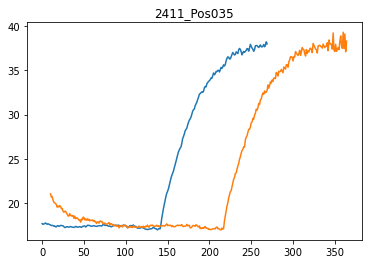

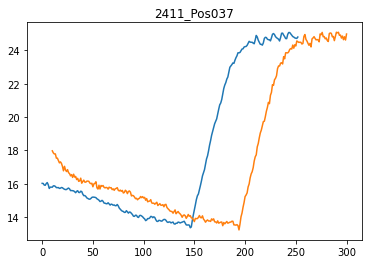

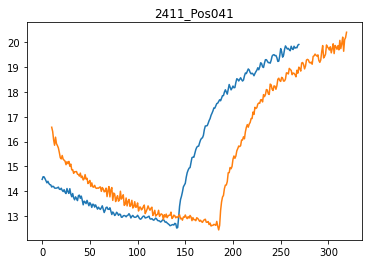

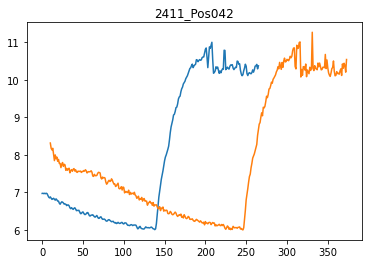

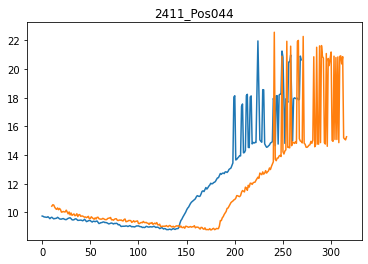

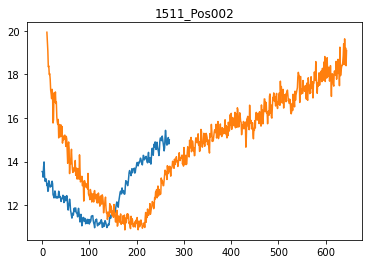

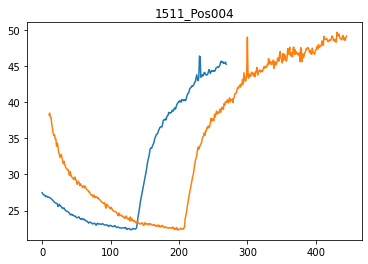

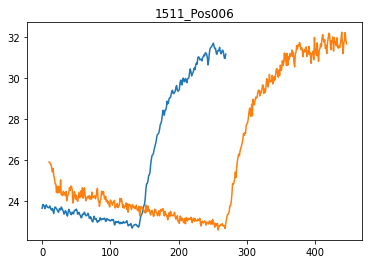

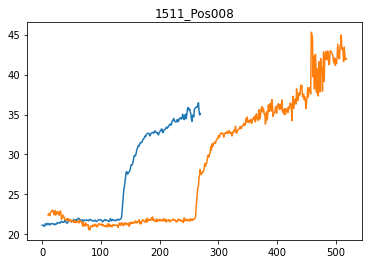

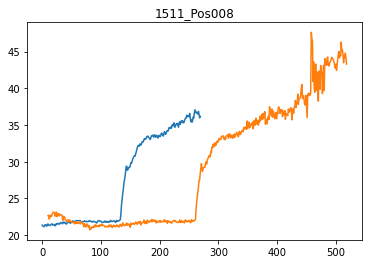

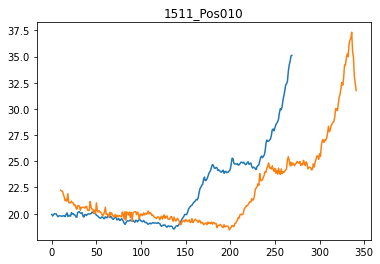

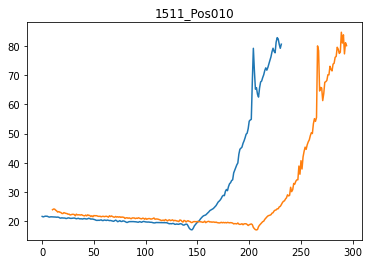

In [3]:
def keratinNormalizedIntensity(lightfiles,darkfiles):
    keratindf={}
    for index in range(len(darkfiles)):
        pos=str(darkfiles[index][darkfiles[index].find(r"os"):darkfiles[index].find(r"os")+5])

        for file in lightfiles:
            if pos in file:

                lightdf=pd.read_csv(file,delimiter="[;,,]",engine="python")
                lightdf=lightdf.iloc[1::2].reset_index(drop=True)
                lightdfmax=lightdf["Mean"].idxmax()
                darkdf=pd.read_csv(darkfiles[index],delimiter="[;,,]",engine="python")
                # set the threshold for valid values
                keratinSTrain = lightdf["Mean"][10:len(darkdf["microns"])] / (darkdf["microns"] / np.max(darkdf["microns"]))[10:]    
                # set the window size for the moving average filter
                window_size = 2
                date=file[file.find(r"11_nov")+7:file.find(r"11_nov")+11]
                keratinStrainclean=np.convolve(keratinSTrain, np.ones(window_size)/window_size, mode='valid')
                keratinStrainclean=keratinStrainclean[lightdfmax-150:lightdfmax+120]
                # find the index of the first value greater than threshold
                plt.title(date+"_"+"P"+pos)
                plt.plot(keratinStrainclean)
                plt.plot(keratinSTrain)
                plt.show()
                keratindf["P"+pos+"_"+date+"_"+str(lightdfmax)]=keratinStrainclean
    return pd.DataFrame.from_dict(keratindf, orient='index').transpose()

lightfiles=glob.glob(r"H:\PHD_data\Imaging_et_analysis\Sp5imaging\Pipettes\11_nov\26112021\Pos*\*Pip_*csv")
darkfiles=glob.glob(r"H:\PHD_data\Imaging_et_analysis\Sp5imaging\Pipettes\11_nov\26112021\Pos*\*Dark*csv")
lightfiles2=glob.glob(r"H:\PHD_data\Imaging_et_analysis\Sp5imaging\Pipettes\11_nov\24112021\Pos*\*Pip_*csv")
darkfiles2=glob.glob(r"H:\PHD_data\Imaging_et_analysis\Sp5imaging\Pipettes\11_nov\24112021\Pos*\*Dark*csv")
lightfiles3=glob.glob(r"H:\PHD_data\Imaging_et_analysis\Sp5imaging\Pipettes\11_nov\15112021\Pos*\*Pip_*csv")
darkfiles3=glob.glob(r"H:\PHD_data\Imaging_et_analysis\Sp5imaging\Pipettes\11_nov\15112021\Pos*\*Dark*csv")

kdf=keratinNormalizedIntensity(lightfiles,darkfiles)
kdf=pd.concat([kdf,keratinNormalizedIntensity(lightfiles2,darkfiles2)],axis=1)
kdf=pd.concat([kdf,keratinNormalizedIntensity(lightfiles3,darkfiles3)],axis=1)

In [12]:
pd.read_csv(darkfiles[6],delimiter="[;,,]",engine="python")

frame  microns
0        0  15.0974
1        1  14.4935
2        2  15.0974
3        3  15.0974
4        4  14.4935
..     ...      ...
298    298  41.0650
299    299  41.0650
300    300  40.4611
301    301  41.0650
302    302  40.4611

[303 rows x 2 columns]

NameError: name 'outputfolder' is not defined

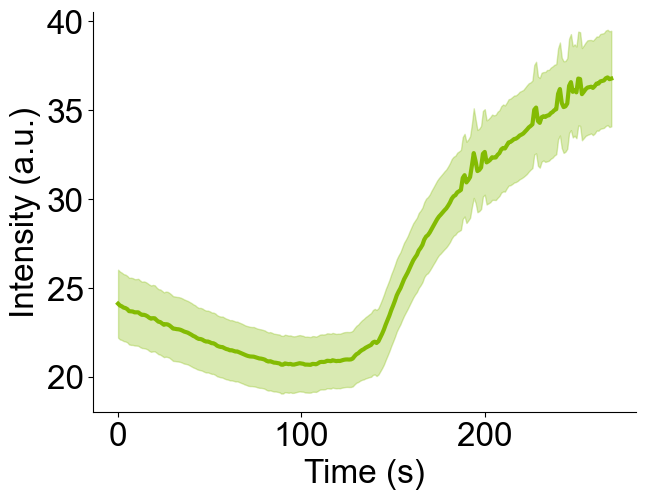

In [75]:
outputfolder="H:\\PHD_data\\"
#plot the mean of data in PeakPLotdf as a line plot with the standard deviation as a shaded area
fig,ax=plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.plot(kdf.mean(axis=1),color="#83bb03",linewidth=3)   
plt.fill_between(kdf.index,kdf.mean(axis=1)-kdf.sem(axis=1),kdf.mean(axis=1)+kdf.sem(axis=1),alpha=0.3,color="#83bb03")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Intensity (a.u.)")
#plt.savefig(outputfolder+"PeakPlot.png",bbox_inches='tight',dpi=300, transparent=True)
plt.show()